
1. **SARIMA and SARIMAX Analysis**:
   - Data visualization (plotting the time series).
   - Stationarity check and making the series stationary if needed.
   - ACF and PACF plots to determine AR and MA terms.
   - SARIMA model training and prediction.
   - SARIMAX model if exogenous variables are needed.
   


2. **Facebook Prophet**:
   - Preparing the data for Prophet (renaming columns).
   - Model fitting and forecasting.
   - Visualizing the predictions.
   


3. **Recurrent Neural Networks (RNNs)**:
   - Data preprocessing for RNNs.
   - Building and training the RNN model.
   - Predictions and evaluation.
   
Let's start with the first part: SARIMA and SARIMAX analysis.



# <a id='toc1_'></a>[Time Series Analysis of COVID](#toc0_)

Models Deployed: ARIMA, SARIMA, SARIMAX, Facebook Prophet, and RNNs
In this notebook, we'll walk through different methods of time series analysis and forecasting using the provided dataset.


**Table of contents**<a id='toc0_'></a>    
- [Time Series Analysis of COVID](#toc1_)    
- [Focused Analysis](#toc2_)    
    - [Visualizing the Data](#toc2_1_1_)    
    - [Checking Stationarity](#toc2_1_2_)    
    - [BoxCox Transformation and Normality Test](#toc2_1_3_)    
    - [Seasonality](#toc2_1_4_)    
    - [ACF and PACF plots](#toc2_1_5_)    
    - [Time Series Cross-Validation Setup](#toc2_1_6_)    
- [Modeling](#toc3_)    
  - [Function for evaluating the model](#toc3_1_)    
  - [ARIMA](#toc3_2_)    
    - [Base Arima Model](#toc3_2_1_)    
    - [Tuned Arima Model](#toc3_2_2_)    
  - [SARIMA](#toc3_3_)    
    - [Base SARIMA Model](#toc3_3_1_)    
    - [Tuned SARIMA Model](#toc3_3_2_)    
  - [Sarimax](#toc3_4_)    
    - [Sarimax Base](#toc3_4_1_)    
    - [Tuned SARIMAX Model](#toc3_4_2_)    
  - [Brute Force Search for SARIMAX Model](#toc3_5_)    
  - [Final Results and Evaluation](#toc3_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


# <a id='toc2_'></a>[Focused Analysis](#toc0_)



### <a id='toc2_1_1_'></a>[Visualizing the Data](#toc0_)

First, let's visualize the time series data to understand its patterns and trends.


In [134]:
from capstone_functions import *
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

# Set the random.seed(42)
np.random.seed(42)


In [135]:

# Load the dataset
master_df = pd.read_parquet("../Data/master_df.parquet")

# These were added later but it was easier to add them here
# master_df = pd.concat([master_df, create_features(master_df).drop(columns=['season','weekday','weekofyear', 'hour'])], axis=1).copy()
# master_df['new_bi_weekly_vaccinations'] = master_df.loc[:,'total_vaccinations'].diff(15).fillna(0)


# sns.set_style('538')
master_df.info()
master_df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1131 entries, 2020-02-15 to 2023-03-21
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   new_confirmed                         1131 non-null   int32  
 1   new_fatal                             1131 non-null   int32  
 2   confirmed                             1131 non-null   int32  
 3   fatal                                 1131 non-null   int32  
 4   infected                              1131 non-null   int32  
 5   new_recovered                         1131 non-null   int32  
 6   recovered                             1131 non-null   int32  
 7   total_removed                         1131 non-null   int32  
 8   new_hospitalized_patients             944 non-null    float32
 9   current_hospitalized_patients         1131 non-null   float32
 10  current_intensive_care_patients       1131 non-null   float32
 11 

new_confirmed  new_fatal  confirmed  fatal  infected  \
date                                                               
2020-02-15              0          0         15      0        15   
2020-02-16              0          0         15      0        15   
2020-02-17             10          0         25      0        25   
2020-02-18              0          0         25      0        25   
2020-02-19              0          0         25      0        25   

            new_recovered  recovered  total_removed  \
date                                                  
2020-02-15              0          0              0   
2020-02-16              0          0              0   
2020-02-17              0          0              0   
2020-02-18              0          0              0   
2020-02-19              0          0              0   

            new_hospitalized_patients  current_hospitalized_patients  \
date                                                                   
2020-02-15                        0.0                            0.0   
2020-02-16                        0.0                            0.0   
2020-02-17                        0.0                            0.0   
2020-02-18                        0.0                            0.0   
2020-02-19                        0.0                            0.0   

            current_intensive_care_patients  average_temperature_celsius  \
date                                                                       
2020-02-15                              0.0                     0.956790   
2020-02-16                              0.0                     3.919753   
2020-02-17                              0.0                     6.197531   
2020-02-18                              0.0                     0.592593   
2020-02-19                              0.0                    -2.753086   

            cancel_events  cumulative_hospitalized_patients  \
date                                                          
2020-02-15            0.0                               0.0   
2020-02-16            0.0                               0.0   
2020-02-17            0.0                               0.0   
2020-02-18            0.0                               0.0   
2020-02-19            0.0                               0.0   

            derived_reproduction_rate  dew_point  excess_mortality  \
date                                                                 
2020-02-15                  35.466824  -6.882716         -2.363827   
2020-02-16                  34.655106  -5.919753         -2.360000   
2020-02-17                  33.889042  -0.481481         -2.294236   
2020-02-18                  33.163906  -5.759259         -2.166535   
2020-02-19                  32.475555  -7.364198         -1.976897   

            excess_mortality_cumulative  excess_mortality_cumulative_absolute  \
date                                                                            
2020-02-15                    -3.049970                         -12854.276367   
2020-02-16                    -3.030000                         -13024.399414   
2020-02-17                    -3.005807                         -13172.550781   
2020-02-18                    -2.977392                         -13298.730469   
2020-02-19                    -2.944754                         -13402.938477   

            facial_coverings  gatherings_restrictions  information_campaigns  \
date                                                                           
2020-02-15               0.0                      0.0                    0.0   
2020-02-16               0.0                      0.0                    0.0   
2020-02-17               0.0                      0.0                    0.0   
2020-02-18               0.0                      0.0                    0.0   
2020-02-19               0.0                      0.0                    0.0   

            internal_movement_restrictions  \
dat

In [136]:
no_null_rows = master_df.dropna().copy()

no_null_col = master_df.dropna(axis=1).copy()


cutoff=15
cutoff_date = no_null_col.index.max() - pd.Timedelta(days=cutoff)

train_df = no_null_col[no_null_col.index < cutoff_date].copy()
test_df = no_null_col[no_null_col.index >= cutoff_date].copy()


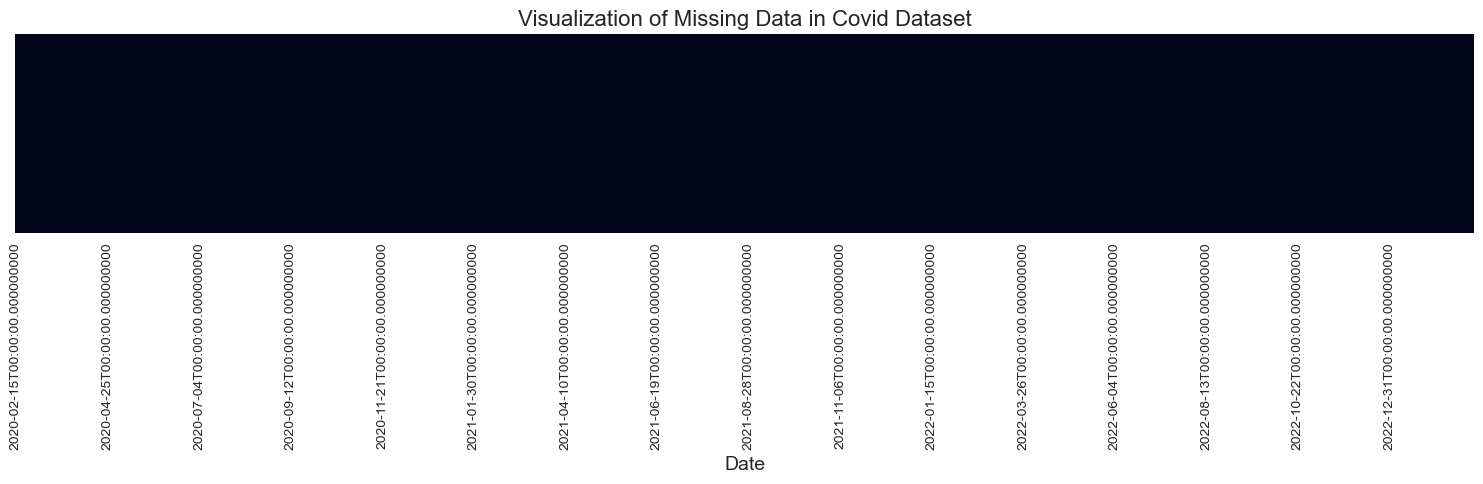

In [137]:
# Your existing code
plt.figure(figsize=(15,5))
sns.heatmap(train_df.isna().T, yticklabels=[], cbar=False)

# Setting x-axis to show every 3 months and starting from 2020-02-15
ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticks(xticks[::5])

plt.title("Visualization of Missing Data in Covid Dataset", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.tight_layout()
plt.show()

In [138]:
# Creating subplots vertically aligned
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=("Daily Confirmed Cases", "Currently Infected", "Total Confirmed"))

# Adding traces for the train dataset
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['new_confirmed'], name='New Confirmed (Train)', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['infected'], name='Currently Infected (Train)', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['confirmed'], name='Total Confirmed (Train)', line=dict(color='blue')), row=3, col=1)

# Adding traces for the test dataset
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['new_confirmed'], name='New Confirmed (Test)', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['infected'], name='Currently Infected (Test)', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['confirmed'], name='Total Confirmed (Test)', line=dict(color='red')), row=3, col=1)

# Update the layout
fig.update_layout(height=800, 
                width=1000, 
                title='Daily Confirmed Cases, Currently Infected, and Total Confirmed',
                xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text='Date', row=3, col=1)
fig.update_yaxes(title_text='New Confirmed Cases', row=1, col=1)
fig.update_yaxes(title_text='Currently Infected', row=2, col=1)
fig.update_yaxes(title_text='Total Confirmed', row=3, col=1)



### <a id='toc2_1_2_'></a>[Checking Stationarity](#toc0_)
Before applying ARIMA or its variants, it's essential to ensure our time series is stationary.


In [139]:
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value','Number of Observations Used'])
    return dfoutput


def test_stationarity(timeseries, plot=True):
    """
    Test the stationarity of a given time series.
    
    This function plots the original time series along with its rolling mean 
    and rolling standard deviation. It then performs the Dickey-Fuller test 
    to statistically test the stationarity of the series.
    
    Parameters:
    - timeseries (pd.Series): The time series data to test for stationarity.
    
    Returns:
    None. However, it displays the plot and prints the results of the Dickey-Fuller test.
    """
    
    # Calculate rolling statistics with a window of 12
    rolmean = timeseries.rolling(window=12).mean()  # Rolling mean
    rolstd = timeseries.rolling(window=12).std()    # Rolling standard deviation

    if plot:
        # Initialize a plotly graph with a secondary y-axis for displaying the rolling std deviation
        fig = make_subplots(specs=[[{"secondary_y": True}]])

        # Plot the original series
        fig.add_trace(go.Scatter(x=timeseries.index, y=timeseries, mode='lines', name='Original', line=dict(color='blue')))
        
        # Plot the rolling mean
        fig.add_trace(go.Scatter(x=rolmean.index, y=rolmean, mode='lines', name='Rolling Mean', line=dict(color='red')))
        
        # Plot the rolling standard deviation on the secondary y-axis
        fig.add_trace(go.Scatter(x=rolstd.index, y=rolstd, mode='lines', name='Rolling Std', line=dict(color='black')), secondary_y=True)

        # Customize the layout of the plot
        fig.update_layout(title='Rolling Mean & Standard Deviation',
                        xaxis_title='Date',
                        yaxis_title='Value',
                        yaxis2_title='Rolling Std Deviation',
                        xaxis=dict(rangeslider=dict(visible=True), type='date'),
                        xaxis_rangeslider_visible=True)

        # Display the visual representation of the series, rolling mean, and std deviation
        fig.show()

    # Perform the Dickey-Fuller test to test the stationarity of the series
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    
    # Display the results of the Dickey-Fuller test
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    display(dfoutput)



In [140]:

test_stationarity(train_df['confirmed'])

# # Display the collected test statistics for each differencing level
# for i, test_stat in enumerate(test_statistics, 1):
#     print(f"Differencing Level {i}: Test Statistic = {test_stat:.2f}")

Results of Dickey-Fuller Test:


Test Statistic                   -0.025558
p-value                           0.956367
#Lags Used                       22.000000
Number of Observations Used    1092.000000
Critical Value (1%)              -3.436353
Critical Value (5%)              -2.864190
Critical Value (10%)             -2.568181
dtype: float64


If the `p-value` is less than 0.05, the series is stationary. Otherwise, you might need to take differences or transformations to make it stationary.


In [141]:
# List to collect the 'Test Statistic' values for each differencing level
test_statistics = []

# Iterate over possible differencing levels from 1 to 19
for i in range(1, 20):
    # Difference the 'confirmed' series by the current level and drop NA values
    differenced_series = train_df['confirmed'].diff(i).dropna()
    
    # Get the test statistic from the stationarity check and append to the list
    test_stat = check_stationarity(differenced_series).loc['Test Statistic']
    test_statistics.append(test_stat)

# Display the collected test statistics for each differencing level
for i, test_stat in enumerate(test_statistics, 1):
    print(f"Differencing Level {i}: Test Statistic = {test_stat:.2f}")

Differencing Level 1: Test Statistic = -4.78
Differencing Level 2: Test Statistic = -4.43
Differencing Level 3: Test Statistic = -4.39
Differencing Level 4: Test Statistic = -3.62
Differencing Level 5: Test Statistic = -3.86
Differencing Level 6: Test Statistic = -3.54
Differencing Level 7: Test Statistic = -3.48
Differencing Level 8: Test Statistic = -3.13
Differencing Level 9: Test Statistic = -2.93
Differencing Level 10: Test Statistic = -3.13
Differencing Level 11: Test Statistic = -2.94
Differencing Level 12: Test Statistic = -3.31
Differencing Level 13: Test Statistic = -3.93
Differencing Level 14: Test Statistic = -4.10
Differencing Level 15: Test Statistic = -4.44
Differencing Level 16: Test Statistic = -3.52
Differencing Level 17: Test Statistic = -3.60
Differencing Level 18: Test Statistic = -3.64
Differencing Level 19: Test Statistic = -3.67


In [142]:
test_stationarity(train_df['new_confirmed'])


Results of Dickey-Fuller Test:


Test Statistic                   -4.783887
p-value                           0.000058
#Lags Used                       21.000000
Number of Observations Used    1093.000000
Critical Value (1%)              -3.436347
Critical Value (5%)              -2.864188
Critical Value (10%)             -2.568180
dtype: float64

### <a id='toc2_1_3_'></a>[BoxCox Transformation and Normality Test](#toc0_)

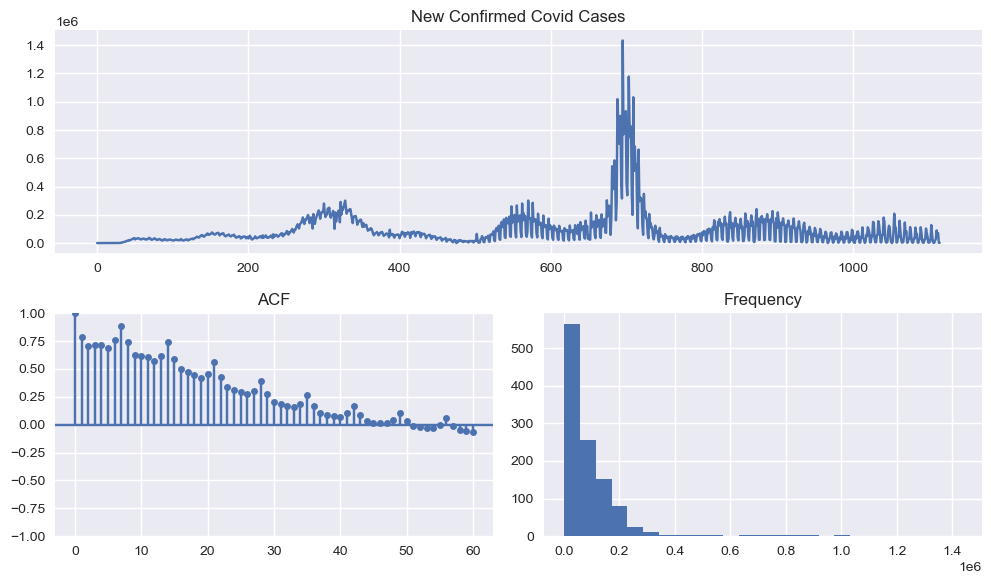

In [143]:
# sns.histplot(data = train_df, x='new_confirmed', bins=100, kde=True);

pm.tsdisplay(train_df['new_confirmed'], title="New Confirmed Covid Cases", lag_max=60, figsize=(10, 6));


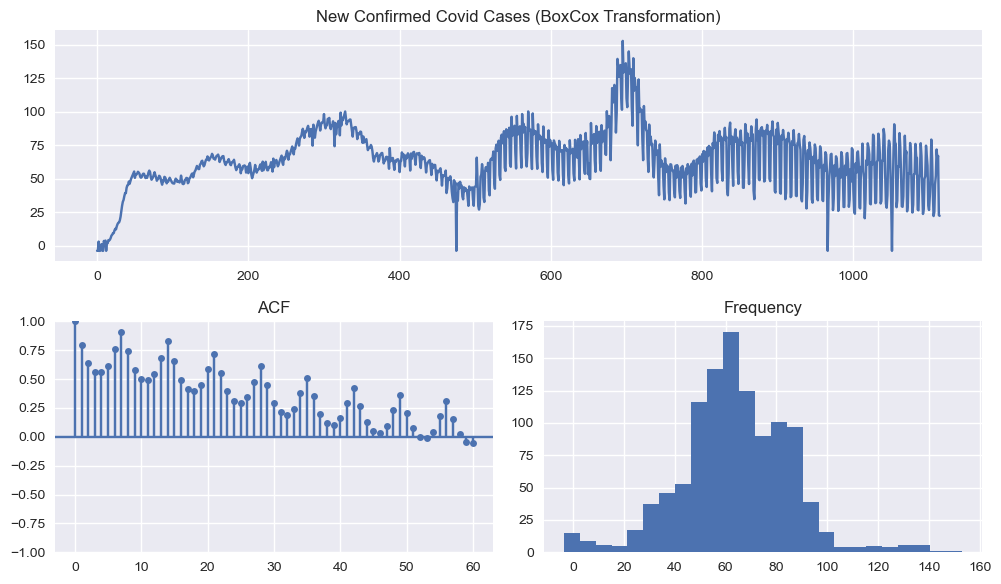

In [144]:
boxcox = BoxCoxEndogTransformer(lmbda2=1e-6)
covid_array = boxcox.fit_transform(train_df['new_confirmed'])[0]
covid_transformed = pd.Series(covid_array, index=train_df.index)

pm.tsdisplay(covid_transformed, title="New Confirmed Covid Cases (BoxCox Transformation)", lag_max=60, figsize=(10, 6))


### <a id='toc2_1_4_'></a>[Seasonality](#toc0_)

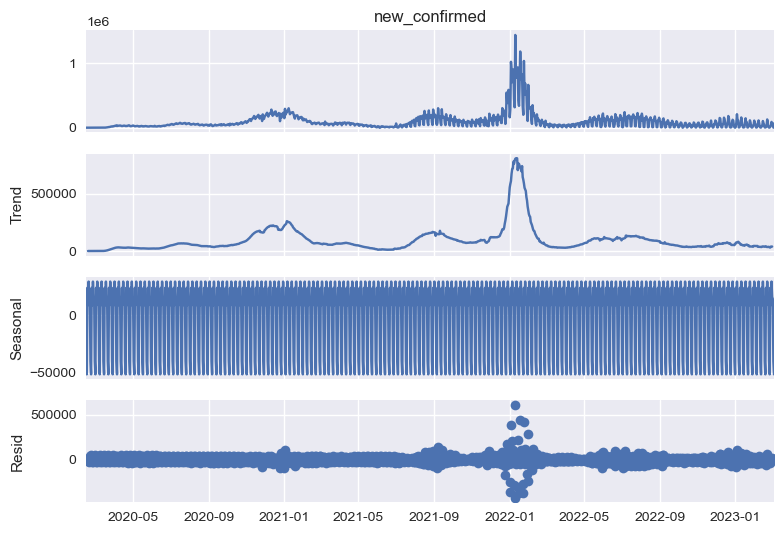

In [145]:
# Performing seasonal decomposition on 'new_confirmed' column
tsa.seasonal_decompose(train_df['new_confirmed'], model='additive', period=7).plot();


This is a little difficult for me to understand, except to say that there really doesn't appear to be much of a seasonal component.

In [146]:
features, target = create_features(train_df, label='new_confirmed')
features_and_target = pd.concat([features, target], axis=1)

features_and_target.head()

hour  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
date                                                                       
2020-02-15     0          5        1      2  2020         46          15   
2020-02-16     0          6        1      2  2020         47          16   
2020-02-17     0          0        1      2  2020         48          17   
2020-02-18     0          1        1      2  2020         49          18   
2020-02-19     0          2        1      2  2020         50          19   

            weekofyear    weekday  season  new_confirmed  
date                                                      
2020-02-15           7   Saturday  Winter              0  
2020-02-16           7     Sunday  Winter              0  
2020-02-17           8     Monday  Winter             10  
2020-02-18           8    Tuesday  Winter              0  
2020-02-19           8  Wednesday  Winter              0

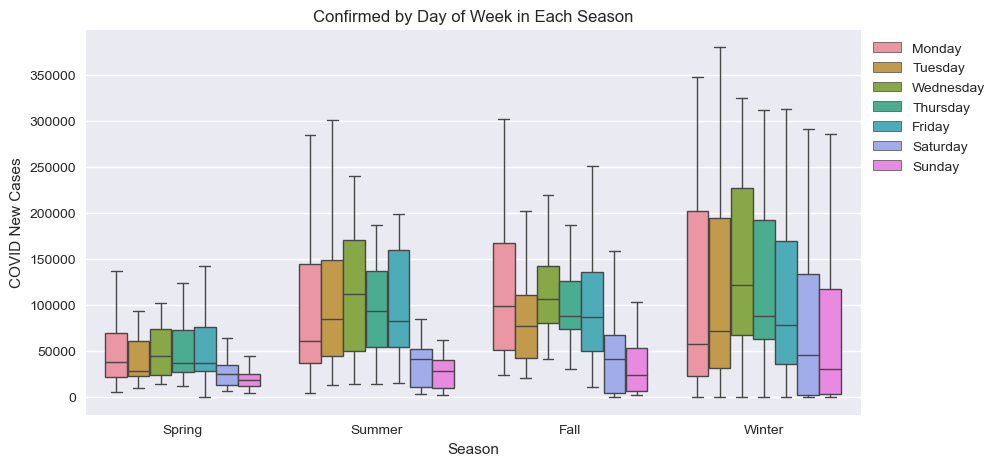

In [147]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='season',
            y='new_confirmed',
            hue='weekday',
            ax=ax,
            linewidth=1,
            showfliers=False)
ax.set_title('Confirmed by Day of Week in Each Season')
ax.set_xlabel('Season')
ax.set_ylabel('COVID New Cases')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


### <a id='toc2_1_5_'></a>[ACF and PACF plots](#toc0_)

To determine the order of the AR and MA terms, we can plot the autocorrelation and partial autocorrelation charts.


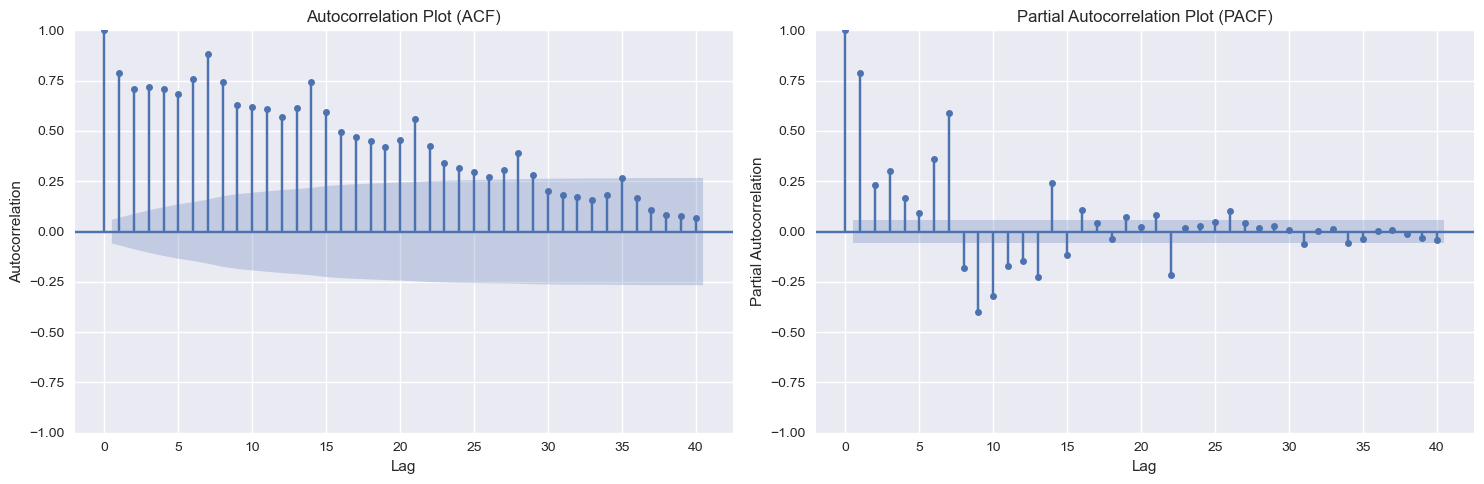

129424.83692432028

In [148]:
# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(train_df['new_confirmed'].dropna(), lags=40, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(train_df['new_confirmed'].dropna(), lags=40, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


train_df['new_confirmed'].std()

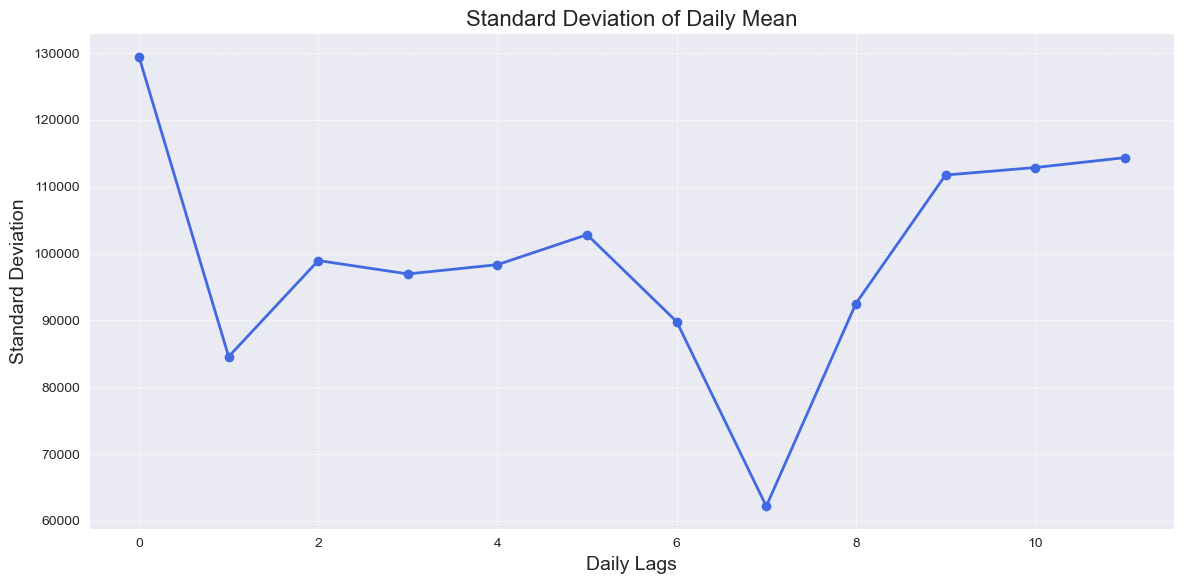

The Base Standard Deviation is : 129424.83692432028
The Standard Deviation of the Daily Mean is: 84574.23635073382
The Standard Deviation of the Daily Mean is: 98951.80181611807
The Standard Deviation of the Daily Mean is: 96951.15993076137
The Standard Deviation of the Daily Mean is: 98335.89029582484
The Standard Deviation of the Daily Mean is: 102827.04637265448
The Standard Deviation of the Daily Mean is: 89806.99627587869
The Standard Deviation of the Daily Mean is: 62188.77476139104
The Standard Deviation of the Daily Mean is: 92519.78091379817
The Standard Deviation of the Daily Mean is: 111745.19422139194
The Standard Deviation of the Daily Mean is: 112869.8161638664
The Standard Deviation of the Daily Mean is: 114348.18985826444


In [149]:
def plot_standard_deviation(data, freq, title):
    std_list = [data['new_confirmed'].std()]
    range_limit = 12 if freq == 'Daily' else 7
    for i in range(1, range_limit):
        diff_dev = data['new_confirmed'].diff(i).std()
        std_list.append(diff_dev)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(std_list, marker='o', linestyle='-', color='royalblue', linewidth=2)
    plt.title(title, fontsize=16)
    plt.xlabel(f'{freq} Lags', fontsize=14)
    plt.ylabel('Standard Deviation', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    

plot_standard_deviation(train_df, 'Daily', 'Standard Deviation of Daily Mean')

print('The Base Standard Deviation is :', train_df['new_confirmed'].std())

for i in range(1, 12):
    diff_dev = train_df['new_confirmed'].diff(i).std()
    
    print('The Standard Deviation of the Daily Mean is:', diff_dev)


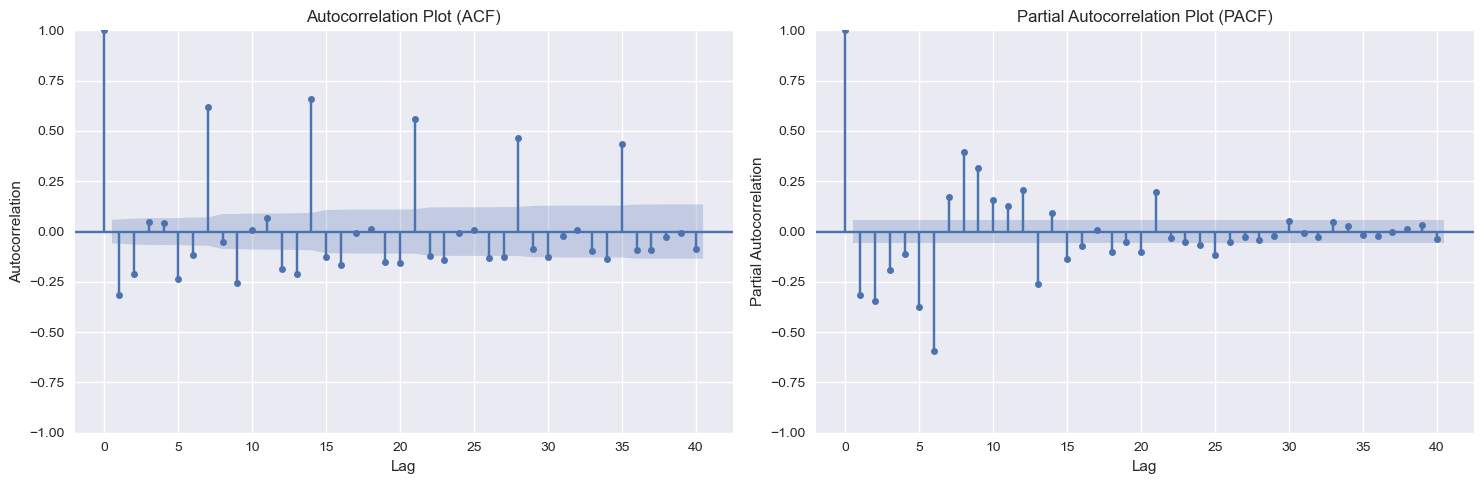

84574.23635073382

In [150]:
# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
adjusting_diff = 1

# Plot ACF
plot_acf(train_df['new_confirmed'].diff(adjusting_diff).dropna(), lags=40, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(train_df['new_confirmed'].diff(adjusting_diff).dropna(), lags=40, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


train_df['new_confirmed'].diff(adjusting_diff).std()

From the PACF it looks like our auto regressive model would only benefit by a maximum of 15-16 days. We will use this as our base p value.  
From our ACF graph it looks like our moving average model would only benefit by a maximum of 25-28 days. We will use this as our base q value.  

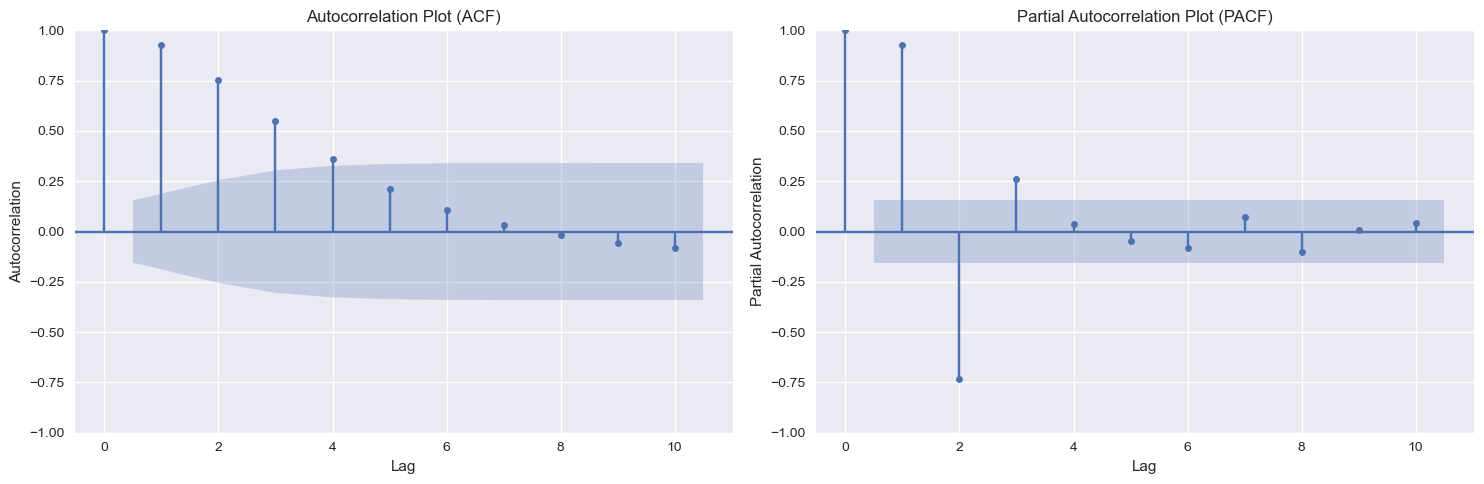

114110.43631715274

In [151]:
weekly_mean = train_df.resample('W').mean()


# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(weekly_mean['new_confirmed'].dropna(), lags=10, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(weekly_mean['new_confirmed'].dropna(), lags=10, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

weekly_mean['new_confirmed'].std()

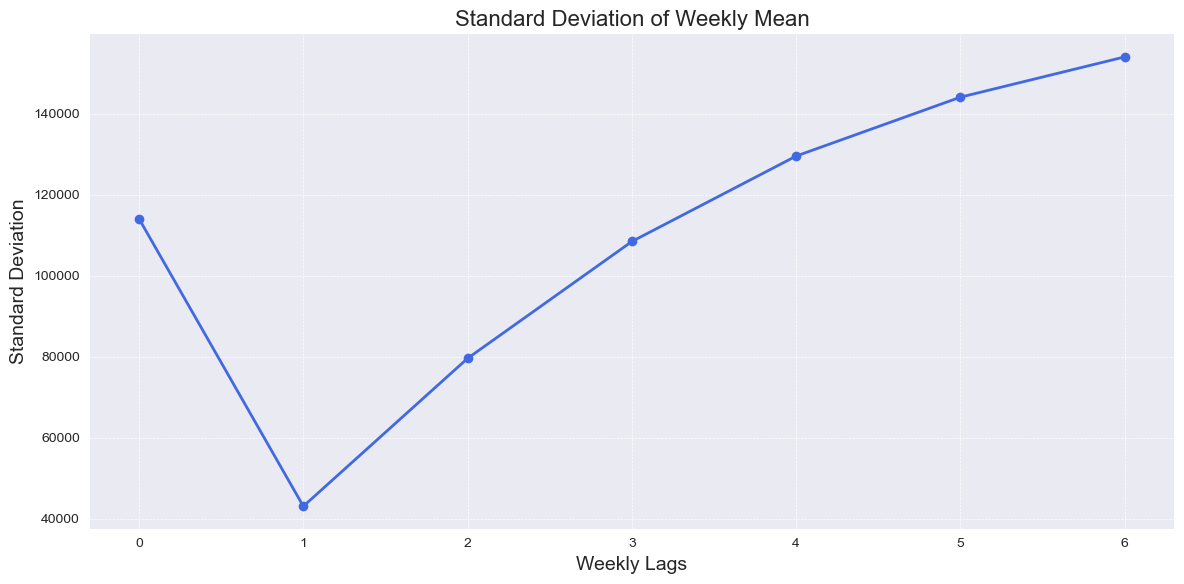

The Base Standard Deviation is : 114110.43631715274
The Standard Deviation of the Weekly Mean is: 43120.52059430725
The Standard Deviation of the Weekly Mean is: 79646.46828713422
The Standard Deviation of the Weekly Mean is: 108507.05449962987
The Standard Deviation of the Weekly Mean is: 129604.08719754293
The Standard Deviation of the Weekly Mean is: 144149.51010354655
The Standard Deviation of the Weekly Mean is: 154092.2561221538


In [152]:

# Plotting the two graphs with enhancements
plot_standard_deviation(weekly_mean, 'Weekly', 'Standard Deviation of Weekly Mean')

print('The Base Standard Deviation is :', weekly_mean['new_confirmed'].std())

for i in range(1, 7):
    diff_dev = weekly_mean['new_confirmed'].diff(i).std()
    
    print('The Standard Deviation of the Weekly Mean is:', diff_dev)


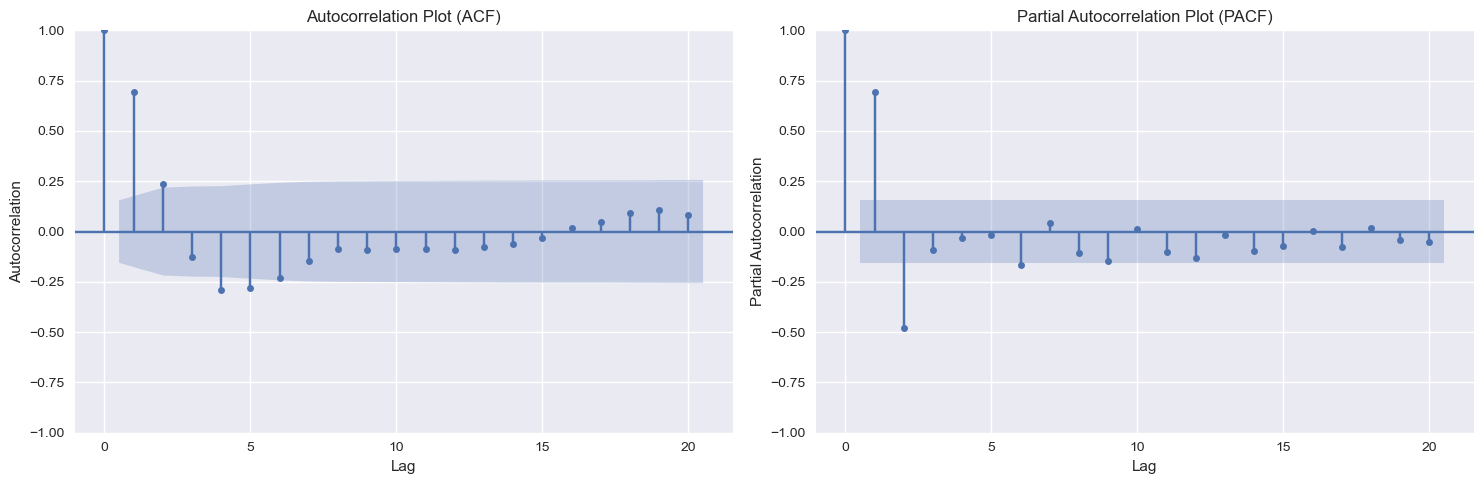

43120.52059430725

In [153]:
weekly_mean = train_df.resample('W').mean()
adjusting_diff = 1


# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(weekly_mean['new_confirmed'].diff(adjusting_diff).dropna(), lags=20, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(weekly_mean['new_confirmed'].diff(adjusting_diff).dropna(), lags=20, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

weekly_mean['new_confirmed'].diff(adjusting_diff).std()

### <a id='toc2_1_6_'></a>[Time Series Cross-Validation Setup](#toc0_)

In [154]:
def plot_cross_val(df: pd.DataFrame,
                    title_text: str,
                    fold_size: int,
                    adjustment: int,
                    rolling: bool=False,
                    window_size: int=150,
                    initial_size: int=200) -> pd.DataFrame:
    """
    Visualize the train and test splits of cross-validation using Plotly.
    
    This function generates a visual representation of how data is split into 
    training and testing sets across multiple iterations of a cross-validation 
    process. It's particularly useful for understanding the behavior of different 
    cross-validation strategies, such as KFold or TimeSeriesSplit.
    
    Parameters:
    - n_splits (int): Number of splits for cross-validation.
    - splitter_func (callable): Cross-validation splitting strategy (e.g., KFold, TimeSeriesSplit).
    - df (pd.DataFrame): Dataframe whose index is to be used for splitting.
    - title_text (str): Title of the plot.
    
    Returns:
    - plot_df (pd.DataFrame): DataFrame with indices used for each split and their corresponding labels.
    """
    
    split = 1
    plot_data = []

    if rolling:
    # Iterate through train and test splits provided by the splitter function
    
        rolling_cv = RollingForecastCV(
            h=fold_size,            # Forecast horizon (28 step ahead)
            step=fold_size+adjustment,         # Step size for rolling window (28 step at a time)
            initial=initial_size)   # Skip the first 20 observations for warm-up
        for train_index, valid_index in rolling_cv.split(df):
            plot_data.append([train_index, 'Train', f'{split}'])
            plot_data.append([valid_index, 'Test', f'{split}'])
            split += 1
    else:
        window_cv = pm.model_selection.SlidingWindowForecastCV(
            window_size=window_size,         # Window size (150 observations)
            h=fold_size,             # Forecast horizon (28 step ahead)
            step=fold_size+adjustment)          # Step size for rolling window (28 step at a time)
        # Iterate through train and test splits provided by the splitter function
        
        for train_index, valid_index in window_cv.split(df):
            plot_data.append([train_index, 'Train', f'{split}'])
            plot_data.append([valid_index, 'Test', f'{split}'])
            split += 1
    
    # Create a DataFrame to hold the indices for plotting
    plot_df = pd.DataFrame(plot_data, columns=['Index', 'Dataset', 'Split']).explode('Index')
    plot_df['Split'] = plot_df['Split'].astype(int)
    plot_df = plot_df.sort_values('Split')

    # Initialize a Plotly figure
    fig = go.Figure()

    # Add traces for each train and test split
    for _, group in plot_df.groupby('Split'):
        fig.add_trace(go.Scatter(x=group['Index'].loc[group['Dataset'] == 'Train'],
                                y=group['Split'].loc[group['Dataset'] == 'Train'],
                                name='Train',
                                line=dict(color="blue", width=10)
                                ))
        fig.add_trace(go.Scatter(x=group['Index'].loc[group['Dataset'] == 'Test'],
                                y=group['Split'].loc[group['Dataset'] == 'Test'],
                                name='Test',
                                line=dict(color="goldenrod", width=10)
                                ))

    # Configure plot layout
    fig.update_layout(template="simple_white", 
                    font=dict(size=20),
                    title_text=title_text, 
                    title_x=0.5, width=850,
                    height=450, 
                    xaxis_title='Index', 
                    yaxis_title='Split')

    # Update legend to avoid duplicate entries
    legend_names = set()
    fig.for_each_trace(
        lambda trace:
        trace.update(showlegend=False)
        if (trace.name in legend_names) else legend_names.add(trace.name))
    fig.show()
    

In [155]:
in_sample_set = train_df['new_confirmed']
out_of_sample_set = test_df['new_confirmed']

number_of_folds = 30

fold_size = int(((len(in_sample_set)-200)/number_of_folds)-round(30/number_of_folds))
adjustment=0

print("Fold Size =", fold_size)


rolling_cv = RollingForecastCV(
    h=fold_size,  # Forecast horizon (28 step ahead)
    step=fold_size+adjustment,  # Step size for rolling window (28 step at a time)
    initial=200)  # Skip the first 200 observations for warm-up


# Plot the time series cross validation splits
plot_cross_val(in_sample_set,
            'Time Series Rolling Forecast Cross-Validation',
            fold_size,
            rolling=True, 
            adjustment=adjustment)

window_cv = pm.model_selection.SlidingWindowForecastCV(
    window_size=150, # Window size (150 observations)
    h=fold_size,  # Forecast horizon (28 step ahead)
    step=fold_size+adjustment)  # Step size for rolling window (28 step at a time)

# Plot the time series cross validation splits
plot_cross_val(in_sample_set,
            'Time Series Sliding Window Cross-Validation',
            fold_size,
            rolling=False, 
            adjustment=adjustment)

Fold Size = 29


# <a id='toc3_'></a>[Modeling](#toc0_)

## <a id='toc3_1_'></a>[Function for evaluating the model](#toc0_)

Creating Functions for Time Series Evaluation

In [156]:
from matplotlib.ticker import FuncFormatter, PercentFormatter

# Format right y-axis with comma notation
def comma_format(x, _):
    return f'{x:,.0f}'

def mape(actual, pred):
    return 100 * np.mean(np.abs(actual - pred) / (np.abs(actual+1)))

def smape(actual, pred):
    return 100 * np.mean(np.abs(actual - pred) / (np.abs(actual) + np.abs(pred)))

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred)**2))


In [157]:
def train_model(y: pd.Series, pipeline, cv, X: pd.DataFrame=None):
    """
    Train a model on the given data and generate predictions.
    
    Parameters:
    - y: DataFrame containing the training data.
    - pipeline: Preprocessing pipeline for the data.
    - cv: Cross-validator for time series data.
    
    Returns:
    - model_preds: Series of model predictions.
    - model_scores: DataFrame containing the scores for various metrics.
    """
    model_preds_data = {
        'predicted': [],  # predicted values
        'lower_conf': [], # lower confidence interval
        'upper_conf': [], # upper confidence interval
        'date': [] # date of prediction
    }
    
    # model_mape_score = pd.Series(name='mape')
    model_smape_score = pd.Series(name='smape')
    model_rmse_score = pd.Series(name='rmse')
    model_mae_score = pd.Series(name='mae')
    
    for train_idx, test_idx in tqdm(cv.split(y)):
        train_set = y.iloc[train_idx]
        test_set = y.iloc[test_idx]
        
        train_exogenous = X.iloc[train_idx] if X is not None else None
        test_exogenous = X.iloc[test_idx] if X is not None else None
        
        assert not train_set.isna().any(), "train_set contains NaN values"
        assert not test_set.isna().any(), "test_set contains NaN values"
        
        model = pipeline.fit(train_set, train_exogenous)
        
        try:
            prediction, conf = model.predict(len(test_set), test_exogenous, return_conf_int= True)
        except:
            prediction = model.predict(len(test_set), test_exogenous)
            conf = np.full(shape=(len(test_set), 2), fill_value=prediction)
        lower_conf = conf[:,0]
        upper_conf = conf[:,1]
            
        model_preds_data['predicted'].extend(prediction)
        model_preds_data['lower_conf'].extend(lower_conf)
        model_preds_data['upper_conf'].extend(upper_conf)
        model_preds_data['date'].extend(test_set.index)
        
        first_date = test_set.index[0]
        model_smape_score[first_date] = smape(test_set, prediction)
        model_rmse_score[first_date] = rmse(test_set, prediction)
        model_mae_score[first_date] = np.mean(np.abs(test_set - prediction))
        # model_mape_score[first_date] = mape(test_set, prediction)
    
    # Generating Daily Metrics
    daily_metrics = pd.DataFrame(model_preds_data)
    daily_metrics['date'] = pd.to_datetime(daily_metrics['date'])
    daily_metrics.set_index('date', inplace=True)
    daily_metrics = pd.concat([daily_metrics, y], axis=1, join='outer')
    daily_metrics['residual'] = daily_metrics[y.name] - daily_metrics['predicted']
    daily_metrics['smape'] =  100 * np.abs(daily_metrics[y.name] - daily_metrics['predicted']) / (np.abs(daily_metrics[y.name]) + np.abs(daily_metrics['predicted']))


    # Generating Model Scores on Validation Sets
    model_scores = pd.DataFrame(
        index=['MAE', 'RMSE', 'sMAPE'], 
        data=[model_mae_score, model_rmse_score, model_smape_score]
    ).T

    # Fitting the Model on the Entire Dataset
    model = pipeline.fit(y)

    return daily_metrics, model_scores, model



In [158]:
def plot_combined_charts(daily_df: pd.DataFrame, validation_scores_df: pd.DataFrame, target_column: str) -> None:
    """
    Plot actual vs predicted values and evaluation metrics side by side.
    
    This function visualizes the actual vs predicted values and evaluation metrics 
    (MAPE, SMAPE, MAE, RMSE) side by side in a 1x2 grid.
    
    Parameters:
    - daily_df (pd.DataFrame): A dataframe containing the actual and predicted values.
    - validation_scores_df (pd.DataFrame): A dataframe with columns 'mape', 'smape', 'mae', and 'rmse'.
    - target_column (str): The name of the target column for which predictions are made.
    
    Returns:
    None. The function displays the plots.
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot Actual vs Predicted on the first axis
    daily_df[f'{target_column}'].plot(ax=ax1, label='Actual', linewidth=2)
    daily_df['predicted'].plot(ax=ax1, label='Cross-Validation Predicted', linestyle='--', linewidth=2)
    ax1.yaxis.set_major_formatter(FuncFormatter(comma_format))
    ax1.set_title(f'Cross Validation of {target_column.replace("_", " ").capitalize()}: Model Predictions vs Actual Data', fontsize=14)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Count')
    ax1.legend()
    
    # Plot Error Metrics on the second axis
    sns.lineplot(x=validation_scores_df.index, y=validation_scores_df['MAE'], ax=ax2, label='MAE', color='b')
    sns.lineplot(x=validation_scores_df.index, y=validation_scores_df['RMSE'], ax=ax2, label='RMSE', color='g')
    
    ax3 = ax2.twinx()
    sns.lineplot(x=validation_scores_df.index, y=validation_scores_df['sMAPE'], ax=ax3, label='sMAPE', color='purple', linestyle='--')
    ax2.set_ylabel('Absolute Error (Covid Cases)')
    ax3.set_ylabel('Percentage Error (Covid Cases)')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x/100)))
    ax3.set_ylim(0, 100)
    ax2.set_title('Cross-Validation Error Metrics: Error over Different Time Periods', fontsize=14)
    ax2.set_xlabel('Date')
    
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles3, labels3 = ax3.get_legend_handles_labels()
    ax2.legend(handles=handles2 + handles3, labels=labels2 + labels3, loc='upper left')
    
    plt.tight_layout()
    plt.show()


In [159]:
def plot_predictions_with_confidence_interval(in_sample_set, model, X_train=None):
    """
    Plot actual versus predicted values along with the 95% confidence interval.
    
    This function takes the actual in-sample set and a fitted model to generate a plot
    showcasing the actual values, predicted values, and the confidence interval. It then
    calculates and returns evaluation metrics in a DataFrame.
    
    Parameters:
    - in_sample_set (pd.Series): The actual values.
    - model: The fitted model.
    
    Returns:
    pd.DataFrame: A dataframe containing evaluation metrics.
    """
    
    # Predict in-sample values and get confidence intervals
    predicted_values, conf_int = model.predict_in_sample(X=X_train, return_conf_int=True, start=60)
    in_sample_set = in_sample_set[60:]
    
    # Create a DataFrame for easier plotting and analysis
    df = pd.DataFrame({
        in_sample_set.name: in_sample_set, 
        'predicted_in_sample': predicted_values,
        'upper_conf': conf_int[:, 1],
        'lower_conf': conf_int[:, 0],
        'residuals': in_sample_set - predicted_values
    }, index=in_sample_set.index)

    # Initialize a Plotly figure for visualization
    fig = go.Figure()

    # Add traces for actual and predicted values, as well as confidence intervals
    fig.add_trace(go.Scatter(x=df.index, y=df[in_sample_set.name], mode='lines', name='Actual', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df.index, y=df['predicted_in_sample'], mode='lines', name='Predicted', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=df.index, y=df['upper_conf'], mode='lines', line=dict(color='rgba(255, 0, 0, 0.3)', width=0), showlegend=False))
    fig.add_trace(go.Scatter(x=df.index, y=df['lower_conf'], mode='lines', name='95% Confidence Interval', line=dict(color='rgba(255, 0, 0, 0.3)', width=0), fill='tonexty'))

    # Update layout to include range sliders for better interactivity
    fig.update_layout(
        title='In-Sample Data vs. Predicted Values with Confidence Intervals',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(count=2, label="2y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        ),
        yaxis=dict(
            title="COVID New Case Count",
            rangemode="tozero"
        )
    )

    # Render the figure
    fig.show()

    # # Create the histogram plot for residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(df['residuals'], kde=True, color="dodgerblue", bins=30)
    
    # Set title and labels
    plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
    plt.xlabel('Residuals', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Show the plot with a tight layout
    plt.tight_layout()
    plt.show()
    
    
    # Compute evaluation metrics
    r2 = r2_score(in_sample_set, predicted_values)
    mae = mean_absolute_error(in_sample_set, predicted_values)
    rmse = np.sqrt(mean_squared_error(in_sample_set, predicted_values))
    smape_val = smape(in_sample_set, predicted_values)

    # Create and return a DataFrame with the calculated metrics
    metrics_df = pd.DataFrame({
        'R-squared': [r2],
        'MAE': [mae],
        'RMSE': [rmse],
        'sMAPE': [smape_val]
    })
    
    # Adjust the figure size
    fig2, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Plot ACF
    plot_acf(df['residuals'].dropna(), lags=40, ax=ax[0], title="Autocorrelation Plot (ACF)")
    ax[0].set_xlabel("Lag")
    ax[0].set_ylabel("Autocorrelation")
    ax[0].grid(True)
    ax[0].tick_params(axis='both', which='major', labelsize=10)

    # Plot PACF
    plot_pacf(df['residuals'].dropna(), lags=40, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
    ax[1].set_xlabel("Lag")
    ax[1].set_ylabel("Partial Autocorrelation")
    ax[1].grid(True)
    ax[1].tick_params(axis='both', which='major', labelsize=10)

    plt.tight_layout()
    plt.show()
    
    return metrics_df.T


In [160]:

def evaluate_forecast(in_sample_set, out_of_sample_set, model, X_test=None):
    """
    Evaluate the performance of an ARIMA forecast against out_of_sample_set values and visualize the results.
    
    This function computes multiple error metrics including MAE, RMSE, MAPE, and sMAPE. 
    It also visualizes the in_sample_set, out_of_sample_set, and predicted series for easier comparison 
    using Plotly.
    
    Parameters:
    - in_sample_set (pd.Series): Series containing in_sample_set values leading up to the forecast.
    - out_of_sample_set (pd.Series): Series containing the out_of_sample_set values for the time period being forecasted.
    - predicted (pd.Series): Series containing the predicted values from the ARIMA model.
    
    Returns:
    - metrics_df (pd.DataFrame): A DataFrame containing the calculated error metrics.
    """
    predicted, conf = model.predict(len(out_of_sample_set), X=X_test, return_conf_int= True)
    predicted = pd.Series(predicted, index=out_of_sample_set.index)
    lower_conf = conf[:,0]
    upper_conf = conf[:,1]    # Calculate daily error metrics
    
    daily_metrics = pd.DataFrame()
    daily_metrics['residual'] = out_of_sample_set - predicted
    daily_metrics['predicted'] =  predicted
    daily_metrics['out_of_sample_set'] =  out_of_sample_set
    daily_metrics['lower_conf'] =  lower_conf
    daily_metrics['upper_conf'] =  upper_conf
    
    
    
    # # Create a seaborn scatter plot
    # fig1 = go.Figure()

    # # Plot mae on the primary y-axis
    # fig1 = px.scatter(daily_metrics, x='predicted', y='residual', title="Predicted Values vs Residuals")
    # fig1.update_layout(title="Predicted Values vs Residuals", xaxis_title="Predicted Values")
    # fig1.update_yaxes(title_text="Residuals")
    # fig1.show()
    
    
    # Create a Plotly visualization to compare in_sample_set, out_of_sample_set, and predicted series
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(y=in_sample_set[-40:], x=in_sample_set.index[-40:], mode='lines', name='In Sample Set', line=dict(color='blue', width=2)))
    fig2.add_trace(go.Scatter(y=out_of_sample_set, x=out_of_sample_set.index, mode='lines', name='Out of Sample Set', line=dict(color='green', width=2)))
    fig2.add_trace(go.Scatter(y=predicted, x=predicted.index, mode='lines', name='Predicted', line=dict(color='red', width=2, dash='dash')))
    
    # Add upper and lower confidence intervals and fill between them
    fig2.add_trace(go.Scatter(x=predicted.index, y=upper_conf, mode='lines', name='Upper Confidence', line=dict(width=0), showlegend=False))
    fig2.add_trace(go.Scatter(x=predicted.index, y=lower_conf, mode='lines', name='Lower Confidence', line=dict(width=0), fill='tonexty', fillcolor='rgba(255,0,0,0.2)', showlegend=False))
    
    # Customize the layout of the plot
    fig2.update_layout(title="out_of_sample_set vs Predicted Values", 
                    xaxis_title="Date", 
                    yaxis_title="Value",
                    xaxis_rangeslider_visible=True)
    
    # Display the visualization
    fig2.show()
    
    
    # Calculate error metrics
    mae = mean_absolute_error(out_of_sample_set, predicted)
    rmse = np.sqrt(mean_squared_error(out_of_sample_set, predicted))
    smape = np.mean(np.abs(out_of_sample_set - predicted) / (np.abs(out_of_sample_set) + np.abs(predicted))) * 100
    # mape = np.mean(np.abs(out_of_sample_set - predicted) / (np.abs(out_of_sample_set+1))) * 100
    
    
    # Return the computed metrics in a DataFrame for further analysis or reporting
    metrics_df = pd.DataFrame({
        'Test Metric': ['MAE', 'RMSE', 'sMAPE'],
        'Value': [mae, rmse, smape]
    })
    
    return metrics_df.set_index('Test Metric') #, daily_metrics


## <a id='toc3_2_'></a>[ARIMA](#toc0_)

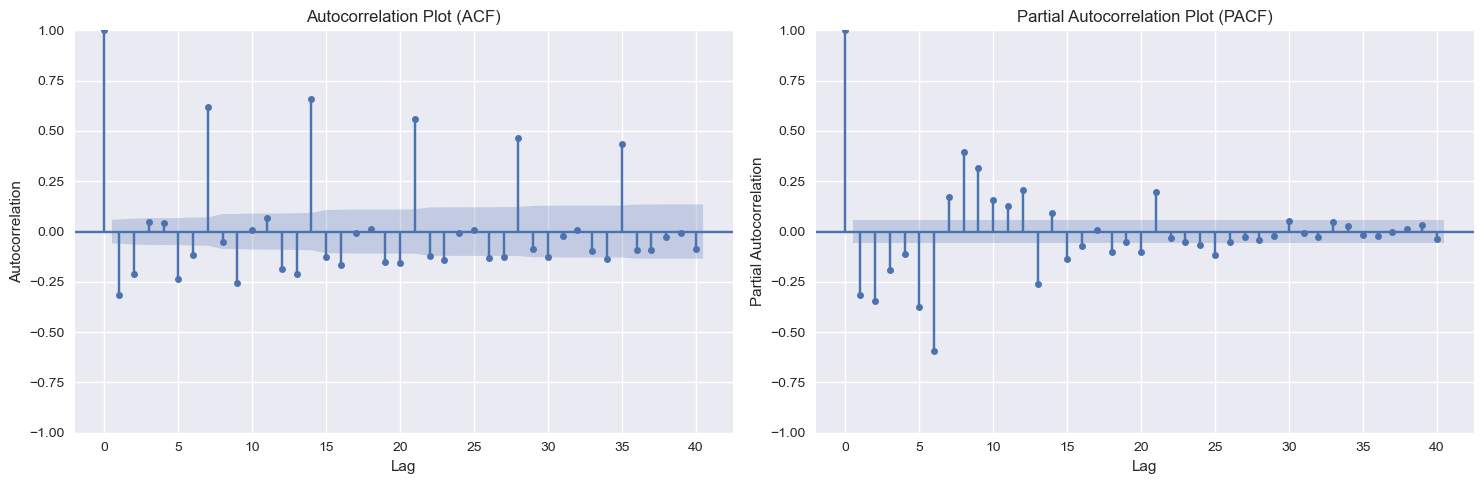

84574.23635073382

In [161]:
# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
adjusting_diff = 1

# Plot ACF
plot_acf(train_df['new_confirmed'].diff(adjusting_diff).dropna(), lags=40, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(train_df['new_confirmed'].diff(adjusting_diff).dropna(), lags=40, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


train_df['new_confirmed'].diff(adjusting_diff).std()

### <a id='toc3_2_1_'></a>[Base Arima Model](#toc0_)

In [162]:
val_eval_holder = pd.DataFrame().rename_axis('Validation Metric', axis=1)
in_sample_eval_holder = pd.DataFrame().rename_axis('In-Sample Metric', axis=1)
out_of_sample_eval_holder = pd.DataFrame()


In [163]:
# Flag to determine if the model should be trained or loaded from disk
training = True

# Check if the training flag is set to True
if training:
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    # and then fits an ARIMA model to the transformed data.
    estimators = [
        ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),  # Box-Cox transformation
        ("model", pm.arima.ARIMA(order= (6,1,2), suppress_warnings=True)) # ARIMA model                   
                        ]
    pipeline = Pipeline(estimators)

else:
    # If not training, then load the pre-trained model from disk
    model_1 = joblib.load('models/ARIMA(6,1,2)(0,0,0)[0] intercept.pkl')
    print("model_1 loaded successfully")


0it [00:00, ?it/s]

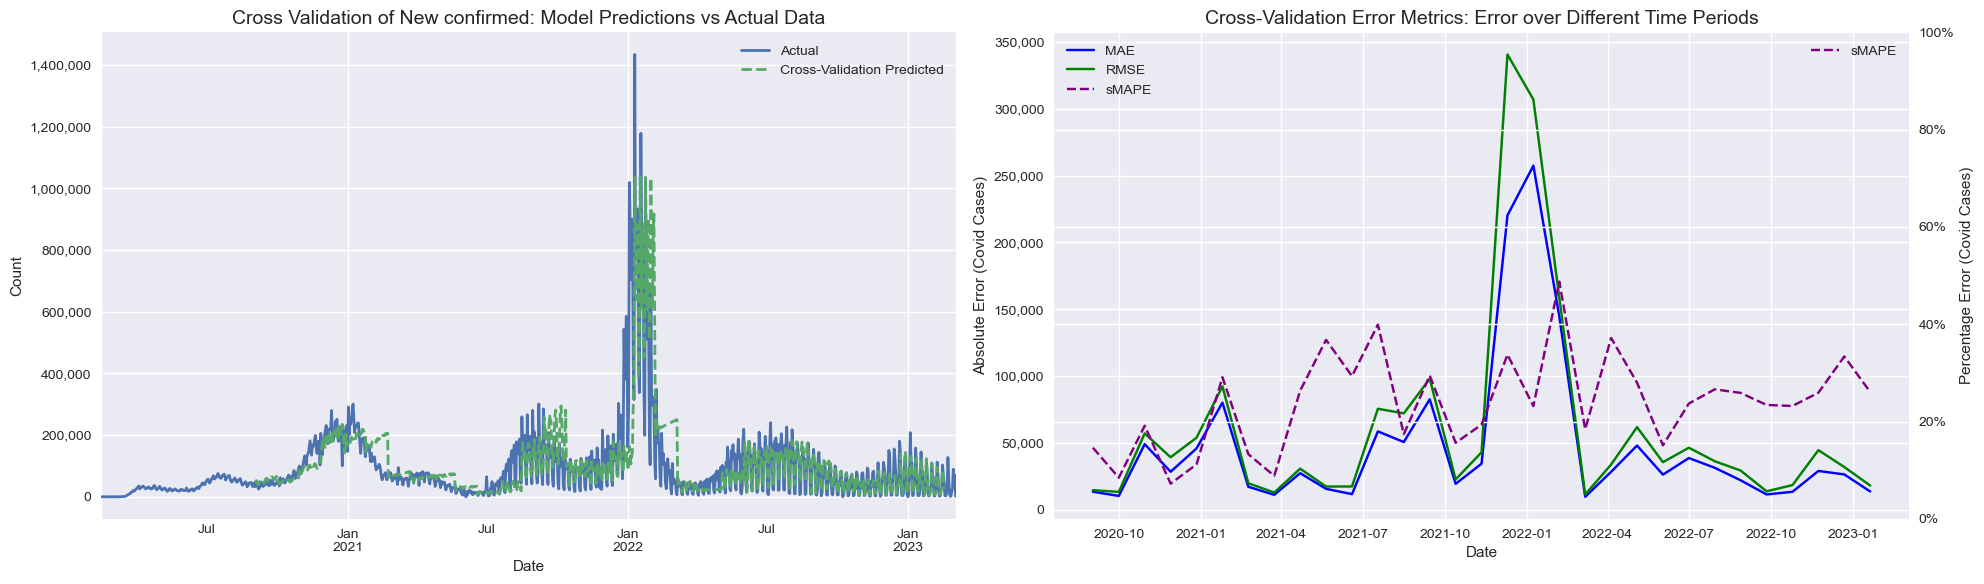

In [164]:

if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_1 = train_model(in_sample_set, pipeline, rolling_cv)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, in_sample_set.name)


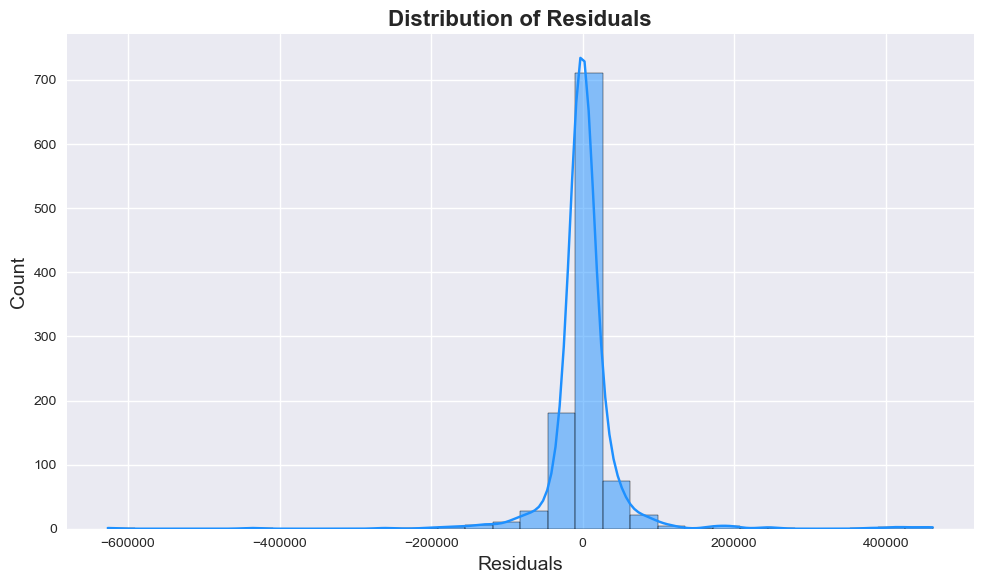

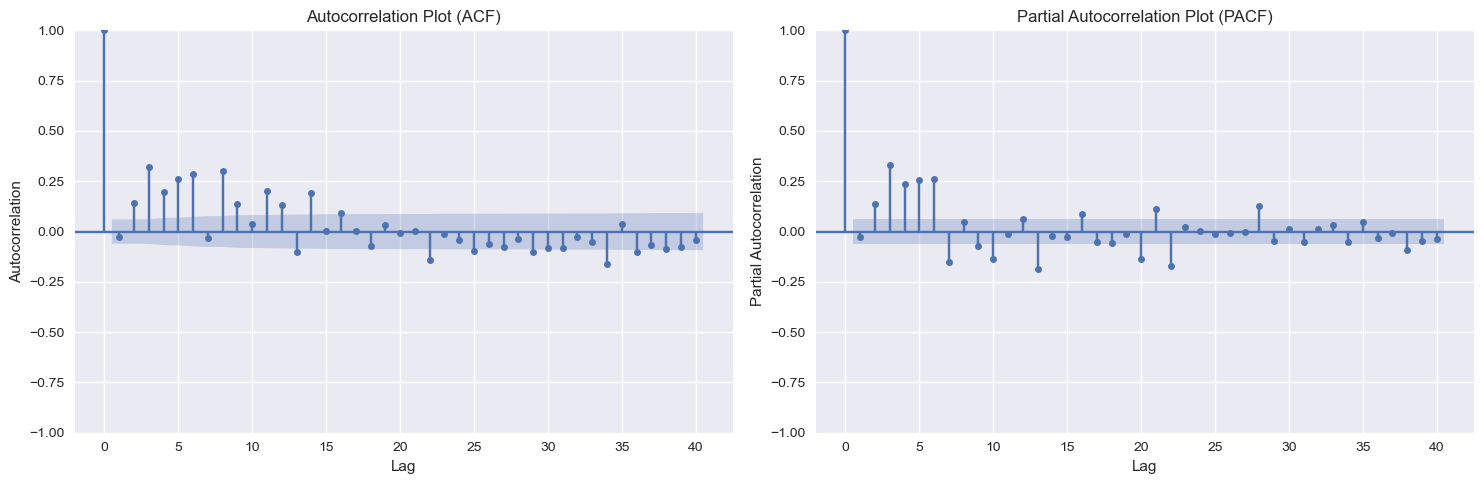

In [165]:

# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model_1)


In [166]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model_1)


In [167]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = str(model_1.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()
in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results



Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept
MAE                                    47635.216405
RMSE                                   60253.263957
sMAPE                                     23.840699

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept
R-squared                                 0.836273
MAE                                   21848.679151
RMSE                                  53173.223443
sMAPE                                    12.439351

In [168]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_1, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_1.summary()

Model pickled to models/ARIMA(6,1,2)(0,0,0)[0] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1115
Model:               SARIMAX(6, 1, 2)   Log Likelihood               -3725.523
Date:                Sun, 30 Jul 2023   AIC                           7471.047
Time:                        20:43:32   BIC                           7521.204
Sample:                             0   HQIC                          7490.010
                               - 1115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2679      0.324      0.827      0.408      -0.367       0.903
ar.L1         -0.8405      0.021    -39.797      0.000      -0.882      -0.799
ar.L2         -0.9312      0.014    -65.074      0.000      -0.959      -0.903
ar.L3         -0.8666      0.017    -49.659      0.000      -0.901      -0.832
ar.L4         -0.8583      0.017    -50.811      0.000      -0.891      -0.825
ar.L5         -0.8922      0.014    -63.049      0.000      -0.920      -0.865
ar.L6         -0.7686      0.016    -47.149      0.000      -0.801      -0.737
ma.L1          0.1280      0.027      4.744      0.000       0.075       0.181
ma.L2          0.3214      0.030     10.727      0.000       0.263       0.380
sigma2        46.6827      1.048     44.527      0.000      44.628      48.738
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              2229.34
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               5.21   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <a id='toc3_2_2_'></a>[Tuned Arima Model](#toc0_)

In [169]:
# Flag to determine if the model should be trained or loaded from disk
training = True


# Check if the training flag is set to True
if training:
    # # If training is required:
    # estimators = [
    # ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),  # Box-Cox transformation
    # ("model", pm.auto_arima(in_sample_set))]  # Data for ARIMA model selection
    
    # # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    # # and then automatically determines the best ARIMA order within the given range using auto_arima.
    # estimators = [
    #     ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),  # Box-Cox transformation
    #     ("model", pm.auto_arima( in_sample_set,  # Data for ARIMA model selection
    #                     d=1,  # Differencing order
    #                     start_p=6,  # Initial AR order for search
    #                     start_q=2,   # Initial MA order for search
    #                     max_p=13,    # Maximum AR order for search
    #                     max_q=5,    # Maximum MA order for search
    #                     seasonal=False,  # No seasonal component
    #                     trace=True))]  # Print the search progress

    # pipeline = Pipeline(estimators)  # Construct the pipeline
    
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= [9, 1, 4], 
                    seasonal=False,
                    suppress_warnings=True))                   
                    ]

    pipeline = Pipeline(estimators) 
    
else:
    # If not training, then load the pre-trained model from disk
    model_2 = joblib.load('models/ARIMA(9,1,4)(0,0,0)[0].pkl')
    print("model_2 loaded successfully")
    


0it [00:00, ?it/s]

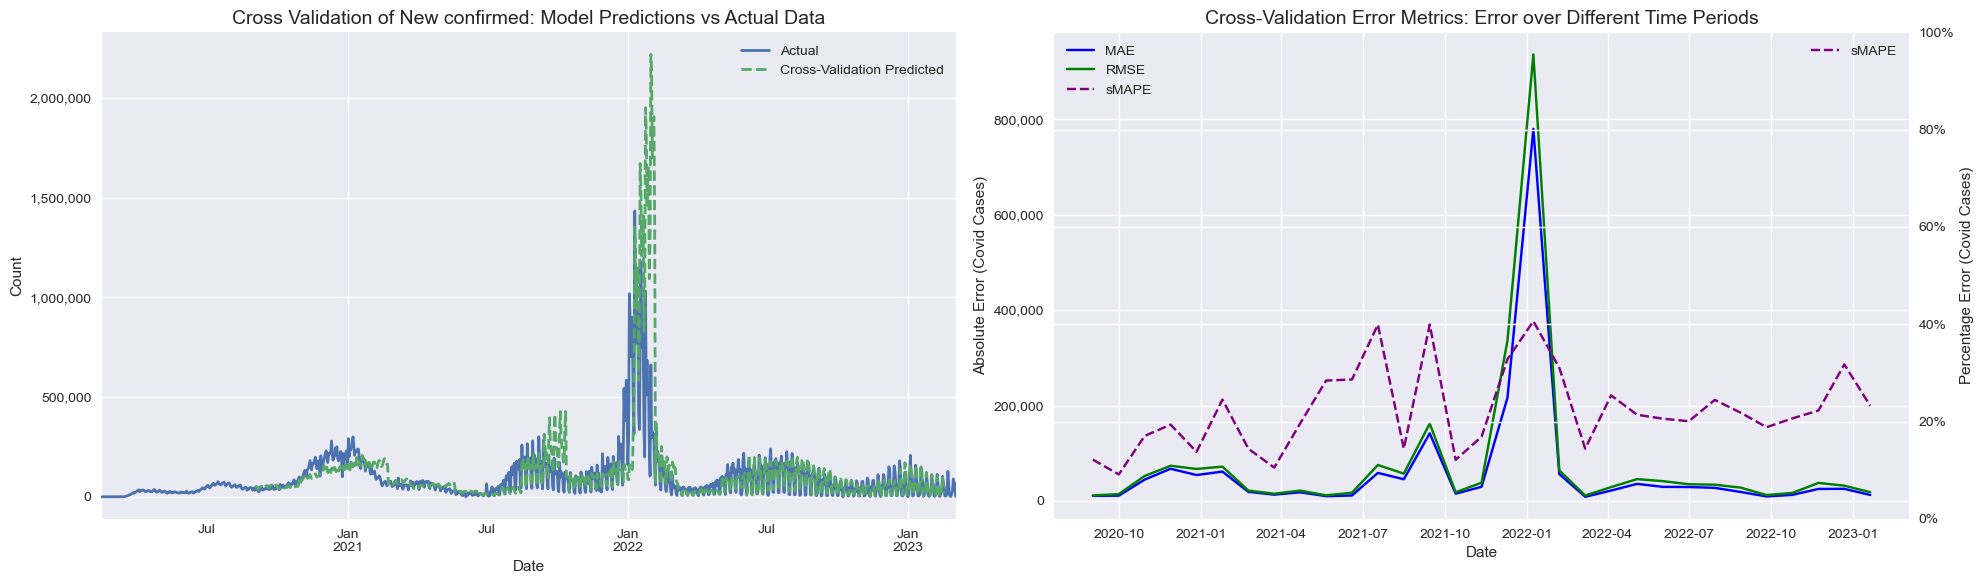

In [170]:

if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_2 = train_model(in_sample_set, pipeline, rolling_cv)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, in_sample_set.name)


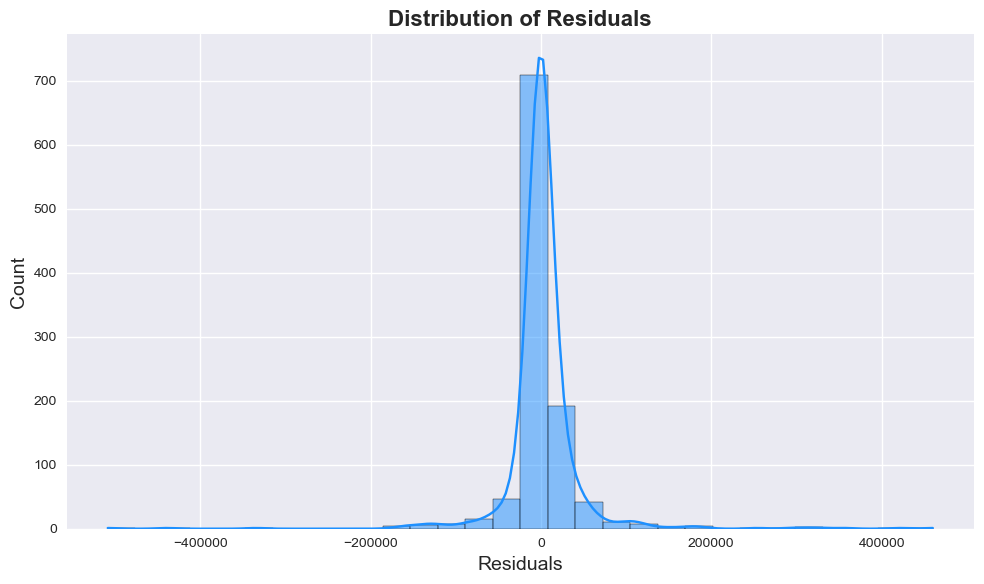

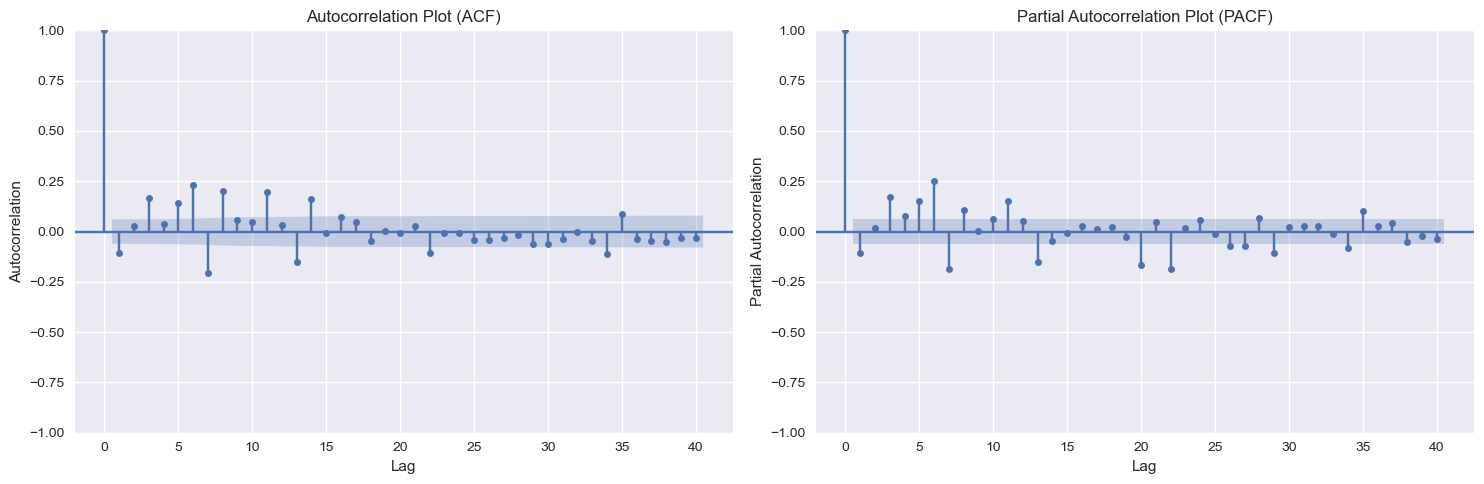

In [171]:

# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model_2)


In [172]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model_2)


In [173]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = str(model_2.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()
in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
MAE                                    47635.216405   
RMSE                                   60253.263957   
sMAPE                                     23.840699   

Validation Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  
MAE                                    61999.073270  
RMSE                                   77662.133258  
sMAPE                                     22.280213

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
R-squared                                 0.836273   
MAE                                   21848.679151   
RMSE                                  53173.223443   
sMAPE                                    12.439351   

In-Sample Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  
R-squared                                 0.865498  
MAE                                   19750.621561  
RMSE                                  48194.508623  
sMAPE                                    11.759770

In [174]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_2, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_2.summary()


Model pickled to models/ARIMA(9,1,4)(0,0,0)[0] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1115
Model:               SARIMAX(9, 1, 4)   Log Likelihood               -3667.968
Date:                Sun, 30 Jul 2023   AIC                           7365.936
Time:                        20:44:40   BIC                           7441.171
Sample:                             0   HQIC                          7394.380
                               - 1115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0353      0.139     -0.253      0.800      -0.309       0.238
ar.L1         -0.3753      0.144     -2.604      0.009      -0.658      -0.093
ar.L2          0.2698      0.132      2.048      0.041       0.012       0.528
ar.L3         -0.3213      0.049     -6.553      0.000      -0.417      -0.225
ar.L4         -0.2669      0.064     -4.167      0.000      -0.392      -0.141
ar.L5         -0.2692      0.053     -5.056      0.000      -0.374      -0.165
ar.L6         -0.1606      0.055     -2.938      0.003      -0.268      -0.053
ar.L7          0.5928      0.043     13.902      0.000       0.509       0.676
ar.L8          0.1080      0.086      1.256      0.209      -0.061       0.277
ar.L9         -0.4243      0.081     -5.236      0.000      -0.583      -0.265
ma.L1         -0.3960      0.146     -2.718      0.007      -0.682      -0.110
ma.L2         -0.4905      0.117     -4.190      0.000      -0.720      -0.261
ma.L3          0.5448      0.086      6.363      0.000       0.377       0.713
ma.L4          0.0126      0.057      0.223      0.824      -0.098       0.123
sigma2        41.0128      0.973     42.171      0.000      39.107      42.919
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2269.12
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               7.15   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## <a id='toc3_3_'></a>[SARIMA](#toc0_)

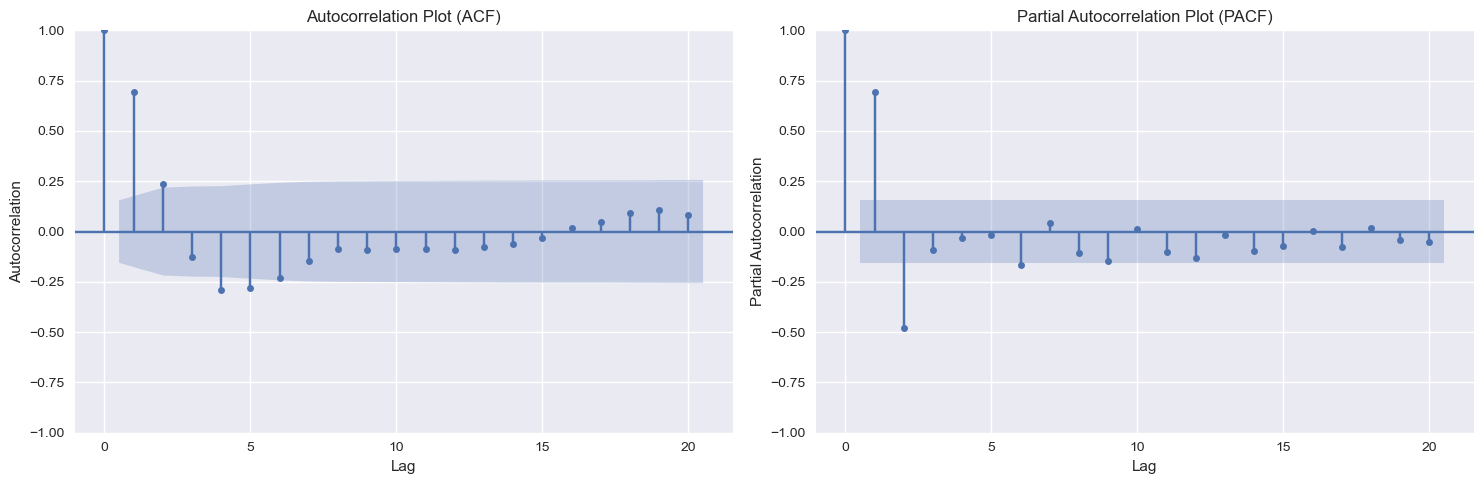

43120.52059430725

In [175]:
other_interval = train_df.resample('W').mean()
adjusting_diff = 1


# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(other_interval['new_confirmed'].diff(adjusting_diff).dropna(), lags=20, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(other_interval['new_confirmed'].diff(adjusting_diff).dropna(), lags=20, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

other_interval['new_confirmed'].diff(adjusting_diff).std()

In [176]:
check_stationarity(other_interval.new_confirmed)

Test Statistic                -3.975711
p-value                        0.001543
Number of Observations Used    2.000000
dtype: float64

### <a id='toc3_3_1_'></a>[Base SARIMA Model](#toc0_)

In [177]:
# Flag to determine if the model should be trained or loaded from disk
training = True

# Check if the training flag is set to True
if training:
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= [6, 1, 2], 
                    seasonal_order =[1, 1, 1, 7],
                    suppress_warnings=True))                   
                    ]

    pipeline = Pipeline(estimators) 

else:
    # If not training, then load the pre-trained model from disk
    model_3 = joblib.load('models/Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept.pkl')
    print("model_3 loaded successfully")



0it [00:00, ?it/s]

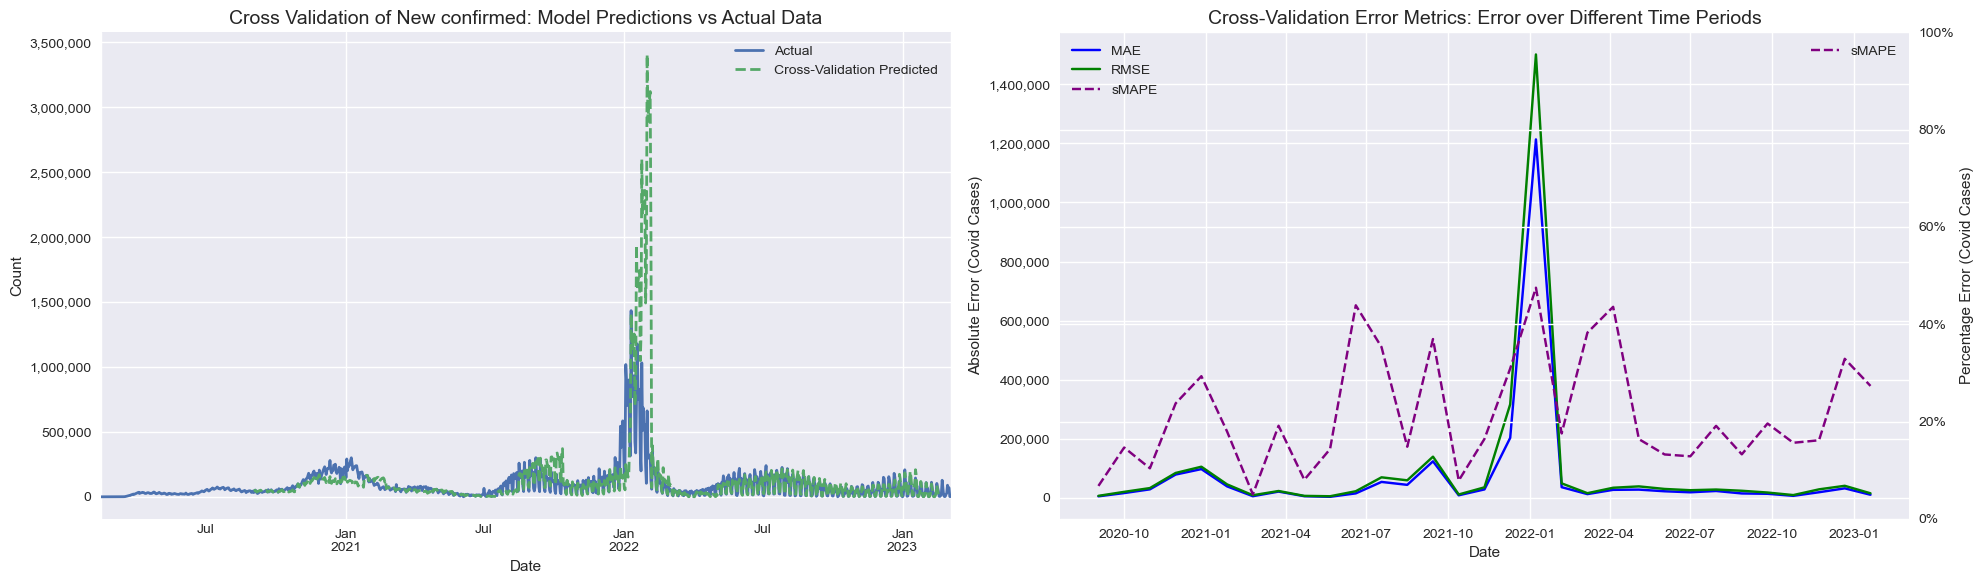

In [178]:

if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_3 = train_model(in_sample_set, pipeline, rolling_cv)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, in_sample_set.name)


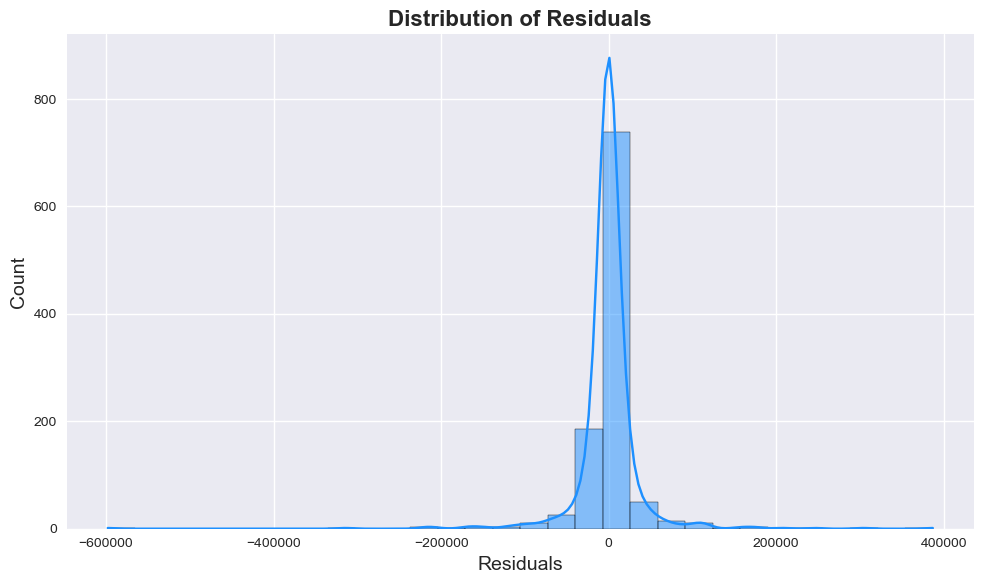

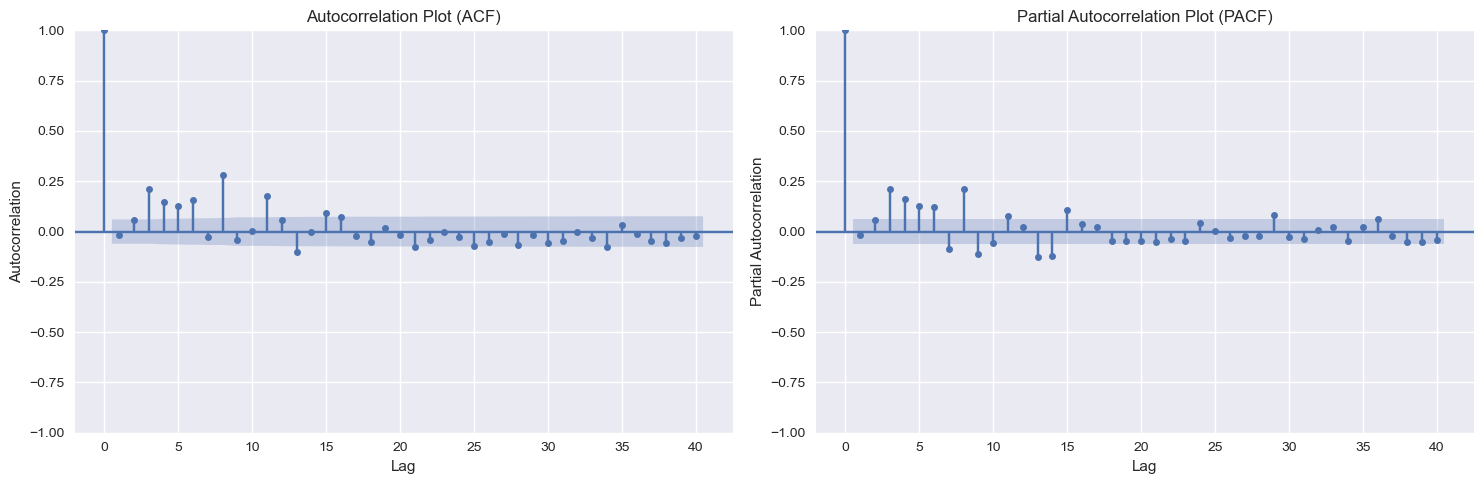

In [179]:

# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model_3)


In [180]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model_3)


In [181]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Seasonal ' + str(model_3.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()

in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
MAE                                    47635.216405   
RMSE                                   60253.263957   
sMAPE                                     23.840699   

Validation Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
MAE                                    61999.073270   
RMSE                                   77662.133258   
sMAPE                                     22.280213   

Validation Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  
MAE                                             73107.036375  
RMSE                                            92348.111389  
sMAPE                                              21.588938

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
R-squared                                 0.836273   
MAE                                   21848.679151   
RMSE                                  53173.223443   
sMAPE                                    12.439351   

In-Sample Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
R-squared                                 0.865498   
MAE                                   19750.621561   
RMSE                                  48194.508623   
sMAPE                                    11.759770   

In-Sample Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  
R-squared                                          0.903506  
MAE                                            16936.208488  
RMSE                                           40820.910422  
sMAPE                                             10.522893

In [182]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"

    # Attempt to save the model to disk using pickling
    joblib.dump(model_3, pickle_tgt, compress=3)
    print("Model pickled to %s" % pickle_tgt)


# Display the summary of the trained model
model_3.summary()

Model pickled to models/Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1115
Model:             SARIMAX(6, 1, 2)x(1, 1, [1], 7)   Log Likelihood               -3494.708
Date:                             Sun, 30 Jul 2023   AIC                           7013.417
Time:                                     20:48:13   BIC                           7073.529
Sample:                                          0   HQIC                          7036.151
                                            - 1115                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0101      0.221     -0.046      0.964      -0.443       0.422
ar.L1         -0.7244     10.874     -0.067      0.947     -22.038      20.589
ar.L2         -0.2466     12.763     -0.019      0.985     -25.261      24.768
ar.L3         -0.1501      8.946     -0.017      0.987     -17.685      17.385
ar.L4         -0.0515      6.032     -0.009      0.993     -11.873      11.770
ar.L5         -0.0387      3.531     -0.011      0.991      -6.959       6.881
ar.L6          0.0782      2.176      0.036      0.971      -4.186       4.342
ma.L1          0.0154     10.876      0.001      0.999     -21.301      21.332
ma.L2         -0.2578      5.055     -0.051      0.959     -10.165       9.649
ar.S.L7        0.0303      0.240      0.126      0.899      -0.440       0.501
ma.S.L7       -0.7004      0.029    -23.929      0.000      -0.758      -0.643
sigma2        32.1756      0.678     47.426      0.000      30.846      33.505
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4371.38
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               6.11   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <a id='toc3_3_2_'></a>[Tuned SARIMA Model](#toc0_)

In [183]:
# Flag to determine if the model should be trained or loaded from disk
training = True

# # Check if the training flag is set to True
if training:
    # # # If training is required:
    
    # # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    # # and then automatically determines the best ARIMA order within the given range using auto_arima.
    # estimators = [
    #     ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    #     ("model", pm.auto_arima(in_sample_set,
    #                     d=1,
    #                     start_p=4, 
    #                     max_p=6, 
    #                     max_q=3, 
    #                     max_P=3, 
    #                     max_Q=3,
    #                     D=1,
    #                     m=7,
    #                     seasonal=True, 
    #                     stationary=True,
    #                     trace=True))]

    # pipeline = Pipeline(estimators)
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= [4, 0, 3], 
                    seasonal_order =[2, 0, 0, 7],
                    suppress_warnings=True))                   
                    ]

    pipeline = Pipeline(estimators) 


else:
    try:
        # If not training, then load the pre-trained model from disk
        model_4 = joblib.load('models/Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept.pkl')
        print("model_4 loaded successfully")
    except:
        print("Error loading model_4")


0it [00:00, ?it/s]

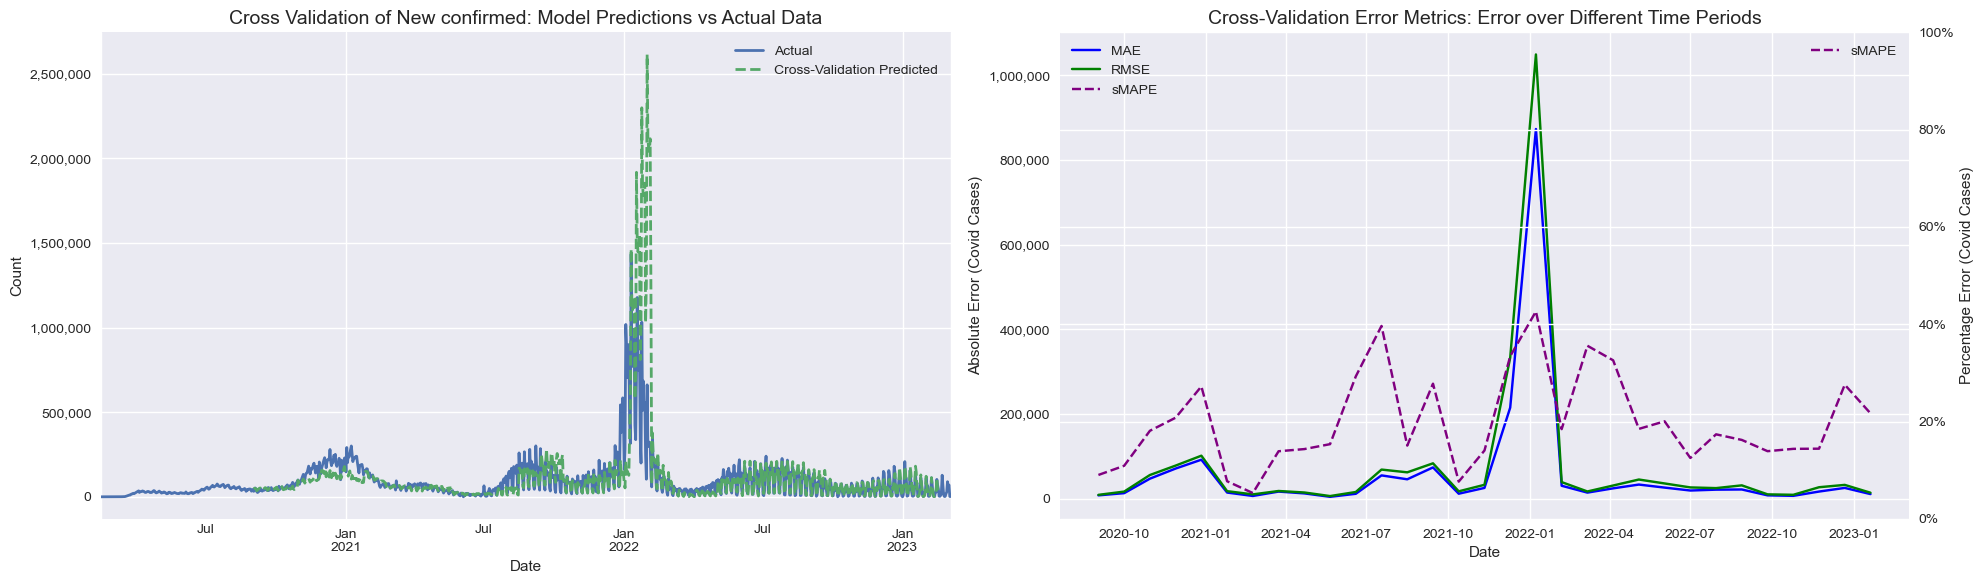

In [184]:

if training:
    # If in training mode:

    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_4 = train_model(in_sample_set, pipeline, rolling_cv)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, in_sample_set.name)


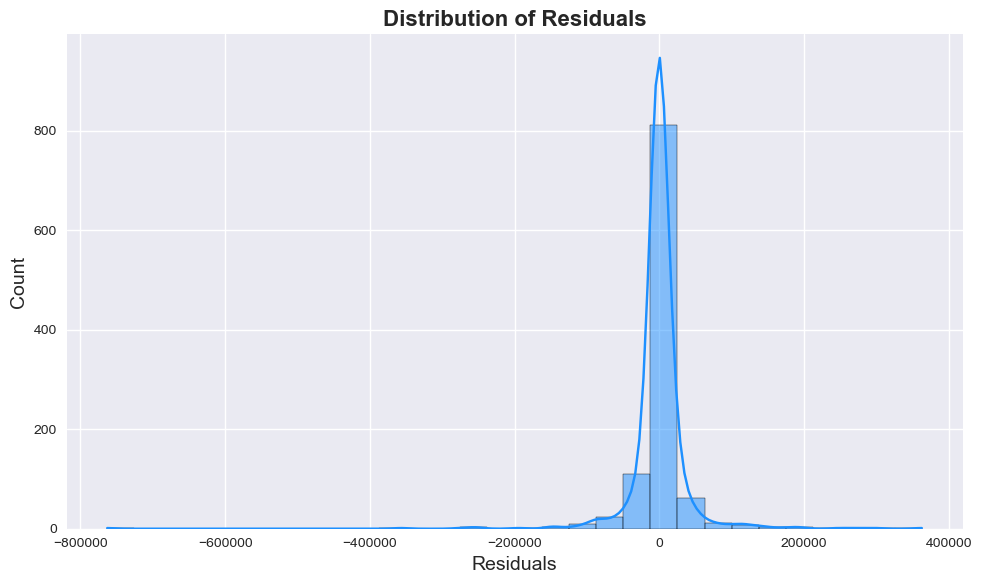

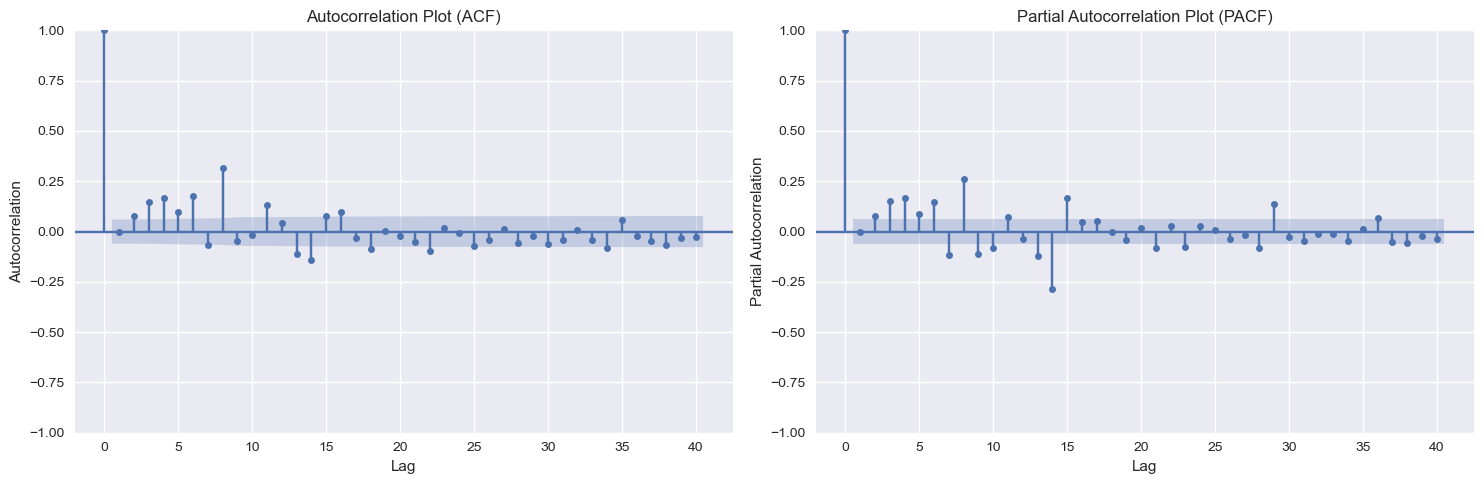

In [185]:

# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model_4)


In [186]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model_4)


In [187]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Seasonal ' + str(model_4.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()
in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
MAE                                    47635.216405   
RMSE                                   60253.263957   
sMAPE                                     23.840699   

Validation Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
MAE                                    61999.073270   
RMSE                                   77662.133258   
sMAPE                                     22.280213   

Validation Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
MAE                                             73107.036375   
RMSE                                            92348.111389   
sMAPE                                              21.588938   

Validation Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  
MAE                                             59686.993980  
RMSE                                            75135.692415  
sMAPE                                              19.863360

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
R-squared                                 0.836273   
MAE                                   21848.679151   
RMSE                                  53173.223443   
sMAPE                                    12.439351   

In-Sample Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
R-squared                                 0.865498   
MAE                                   19750.621561   
RMSE                                  48194.508623   
sMAPE                                    11.759770   

In-Sample Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
R-squared                                          0.903506   
MAE                                            16936.208488   
RMSE                                           40820.910422   
sMAPE                                             10.522893   

In-Sample Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  
R-squared                                          0.881228  
MAE                                            17615.753920  
RMSE                                           45288.652061  
sMAPE                                             10.374079

In [188]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_4, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")

# Display the summary of the trained model
model_4.summary()

Model pickled to models/Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1115
Model:             SARIMAX(4, 0, 3)x(2, 0, [], 7)   Log Likelihood               -3574.259
Date:                            Sun, 30 Jul 2023   AIC                           7170.518
Time:                                    20:51:49   BIC                           7225.700
Sample:                                         0   HQIC                          7191.380
                                           - 1115                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0031      0.055      0.057      0.955      -0.106       0.112
ar.L1          1.9010      0.066     28.708      0.000       1.771       2.031
ar.L2         -1.7098      0.107    -15.916      0.000      -1.920      -1.499
ar.L3          0.7112      0.086      8.230      0.000       0.542       0.881
ar.L4          0.0534      0.041      1.300      0.194      -0.027       0.134
ma.L1         -1.7147      0.063    -27.414      0.000      -1.837      -1.592
ma.L2          1.5899      0.076     20.860      0.000       1.441       1.739
ma.L3         -0.5587      0.049    -11.451      0.000      -0.654      -0.463
ar.S.L7        0.5088      0.016     31.037      0.000       0.477       0.541
ar.S.L14       0.4885      0.016     29.956      0.000       0.457       0.520
sigma2        34.7232      0.653     53.175      0.000      33.443      36.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4848.79
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               5.53   Skew:                            -1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## <a id='toc3_4_'></a>[Sarimax](#toc0_)

In [189]:
# import in variance inflation facctor test and add constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import RFE


In [190]:
y_train = in_sample_set
y_test = out_of_sample_set

# # Assuming in_sample_set is a DataFrame

most_important = ['stringency_index', 'derived_reproduction_rate', 'total_vaccinations', 
                'current_hospitalized_patients',  'excess_mortality', 'month']

X_train = train_df[most_important]
X_test = test_df[['stringency_index', 'derived_reproduction_rate', 'current_hospitalized_patients',  
                'excess_mortality', 'month', 'new_bi_weekly_vaccinations']]

In [191]:
y_train

date
2020-02-15        0
2020-02-16        0
2020-02-17       10
2020-02-18        0
2020-02-19        0
              ...  
2023-03-01    89261
2023-03-02    62111
2023-03-03    69509
2023-03-04     1671
2023-03-05     1567
Name: new_confirmed, Length: 1115, dtype: int32

In [192]:
X_train

stringency_index  derived_reproduction_rate  total_vaccinations  \
date                                                                          
2020-02-15          8.330000                  35.466824                 0.0   
2020-02-16          8.330000                  34.655106                 0.0   
2020-02-17          8.330000                  33.889042                 0.0   
2020-02-18          8.330000                  33.163906                 0.0   
2020-02-19          8.330000                  32.475555                 0.0   
...                      ...                        ...                 ...   
2023-03-01         37.040001                   1.396927         673110208.0   
2023-03-02         37.040001                   1.376828         673180416.0   
2023-03-03         37.040001                   1.359076         673258624.0   
2023-03-04         37.040001                   1.342999         673290304.0   
2023-03-05         37.040001                   1.328075         673307008.0   

            current_hospitalized_patients  excess_mortality  month  
date                                                                
2020-02-15                            0.0         -2.363827      2  
2020-02-16                            0.0         -2.360000      2  
2020-02-17                            0.0         -2.294236      2  
2020-02-18                            0.0         -2.166535      2  
2020-02-19                            0.0         -1.976897      2  
...                                   ...               ...    ...  
2023-03-01                        21328.0          0.243848      3  
2023-03-02                        20771.0          0.086321      3  
2023-03-03                        20401.0         -0.098766      3  
2023-03-04                        19732.0         -0.304207      3  
2023-03-05                        19825.0         -0.530000      3  

[1115 rows x 6 columns]

In [193]:

# # #Selecting the Best important features according to LGBMRegressor
rfe_selector = RFE(estimator=LGBMRegressor(), n_features_to_select = 7, step = 1)
rfe_selector.fit(X_train, y_train)


X_train = X_train.loc[:,X_train.columns[rfe_selector.get_support()]]
X_train.columns

Index(['stringency_index', 'derived_reproduction_rate', 'total_vaccinations',
       'current_hospitalized_patients', 'excess_mortality', 'month'],
      dtype='object')

In [194]:
X_train = add_constant(X_train)

#  VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
display(vif_data.sort_values(by='VIF', ascending=False).style.background_gradient(cmap='coolwarm', vmax=10))


X_train.drop(columns=['const'], inplace=True)

In [195]:
for i in X_train.columns:
    print(i)
    test_stationarity(X_train[i], False)
    


stringency_index
Results of Dickey-Fuller Test:


Test Statistic                   -3.480629
p-value                           0.008499
#Lags Used                        7.000000
Number of Observations Used    1107.000000
Critical Value (1%)              -3.436271
Critical Value (5%)              -2.864154
Critical Value (10%)             -2.568162
dtype: float64

derived_reproduction_rate
Results of Dickey-Fuller Test:


Test Statistic                -7.680514e+00
p-value                        1.508315e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.111000e+03
Critical Value (1%)           -3.436250e+00
Critical Value (5%)           -2.864145e+00
Critical Value (10%)          -2.568157e+00
dtype: float64

total_vaccinations
Results of Dickey-Fuller Test:


Test Statistic                   -1.174769
p-value                           0.684354
#Lags Used                       22.000000
Number of Observations Used    1092.000000
Critical Value (1%)              -3.436353
Critical Value (5%)              -2.864190
Critical Value (10%)             -2.568181
dtype: float64

current_hospitalized_patients
Results of Dickey-Fuller Test:


Test Statistic                   -4.176911
p-value                           0.000721
#Lags Used                       21.000000
Number of Observations Used    1093.000000
Critical Value (1%)              -3.436347
Critical Value (5%)              -2.864188
Critical Value (10%)             -2.568180
dtype: float64

excess_mortality
Results of Dickey-Fuller Test:


Test Statistic                   -3.965169
p-value                           0.001604
#Lags Used                       21.000000
Number of Observations Used    1093.000000
Critical Value (1%)              -3.436347
Critical Value (5%)              -2.864188
Critical Value (10%)             -2.568180
dtype: float64

month
Results of Dickey-Fuller Test:


Test Statistic                   -2.941923
p-value                           0.040686
#Lags Used                        0.000000
Number of Observations Used    1114.000000
Critical Value (1%)              -3.436234
Critical Value (5%)              -2.864138
Critical Value (10%)             -2.568153
dtype: float64

In [196]:
test_statistics = []
# Iterate over possible differencing levels from 1 to 19
for i in range(1, 20):
    # Difference the 'confirmed' series by the current level and drop NA values
    differenced_series = X_train['total_vaccinations'].diff(i).dropna()
    
    # Get the test statistic from the stationarity check and append to the list
    test_stat = check_stationarity(differenced_series).loc['Test Statistic']
    test_statistics.append(test_stat)

# Display the collected test statistics for each differencing level
for i, test_stat in enumerate(test_statistics, 1):
    print(f"Differencing Level {i}: Test Statistic = {test_stat:.2f}")

Differencing Level 1: Test Statistic = -2.14
Differencing Level 2: Test Statistic = -2.18
Differencing Level 3: Test Statistic = -2.34
Differencing Level 4: Test Statistic = -2.31
Differencing Level 5: Test Statistic = -2.45
Differencing Level 6: Test Statistic = -1.99
Differencing Level 7: Test Statistic = -2.15
Differencing Level 8: Test Statistic = -2.73
Differencing Level 9: Test Statistic = -2.40
Differencing Level 10: Test Statistic = -2.20
Differencing Level 11: Test Statistic = -2.11
Differencing Level 12: Test Statistic = -2.49
Differencing Level 13: Test Statistic = -2.72
Differencing Level 14: Test Statistic = -2.85
Differencing Level 15: Test Statistic = -3.75
Differencing Level 16: Test Statistic = -3.21
Differencing Level 17: Test Statistic = -2.73
Differencing Level 18: Test Statistic = -2.46
Differencing Level 19: Test Statistic = -2.52


In [197]:
X_train['bi_weekly_vaccinations'] = X_train.loc[:,'total_vaccinations'].diff(15)
X_train.head(20)

stringency_index  derived_reproduction_rate  total_vaccinations  \
date                                                                          
2020-02-15          8.330000                  35.466824                 0.0   
2020-02-16          8.330000                  34.655106                 0.0   
2020-02-17          8.330000                  33.889042                 0.0   
2020-02-18          8.330000                  33.163906                 0.0   
2020-02-19          8.330000                  32.475555                 0.0   
2020-02-20          8.330000                  31.820343                 0.0   
2020-02-21          8.330000                  31.195034                 0.0   
2020-02-22          8.330000                  30.596754                 0.0   
2020-02-23          8.330000                  30.022940                 0.0   
2020-02-24          8.330000                  29.471287                 0.0   
2020-02-25          8.330000                  28.939724                 0.0   
2020-02-26          8.330000                  28.426376                 0.0   
2020-02-27          8.330000                  27.929544                 0.0   
2020-02-28          8.330000                  27.447676                 0.0   
2020-02-29          8.330000                  26.979353                 0.0   
2020-03-01         11.110000                  26.523272                 0.0   
2020-03-02         11.110000                  26.078230                 0.0   
2020-03-03         11.110000                  25.643112                 0.0   
2020-03-04         11.110000                  25.216887                 0.0   
2020-03-05         20.370001                  24.798582                 0.0   

            current_hospitalized_patients  excess_mortality  month  \
date                                                                 
2020-02-15                            0.0         -2.363827      2   
2020-02-16                            0.0         -2.360000      2   
2020-02-17                            0.0         -2.294236      2   
2020-02-18                            0.0         -2.166535      2   
2020-02-19                            0.0         -1.976897      2   
2020-02-20                            0.0         -1.734526      2   
2020-02-21                            0.0         -1.494650      2   
2020-02-22                            0.0         -1.266475      2   
2020-02-23                            0.0         -1.050000      2   
2020-02-24                            0.0         -0.845225      2   
2020-02-25                            0.0         -0.652150      2   
2020-02-26                            0.0         -0.470775      2   
2020-02-27                            0.0         -0.301870      2   
2020-02-28                            0.0         -0.150054      2   
2020-02-29                            0.0         -0.016098      2   
2020-03-01                            0.0          0.100000      3   
2020-03-02                            0.0          0.198238      3   
2020-03-03                            0.0          0.278618      3   
2020-03-04                            0.0          0.341138      3   
2020-03-05                            0.0          0.386766      3   

            bi_weekly_vaccinations  
date                                
2020-02-15                     NaN  
2020-02-16                     NaN  
2020-02-17                     NaN  
2020-02-18                     NaN  
2020-02-19                     NaN  
2020-02-20                     NaN  
2020-02-21                     NaN  
2020-02-22                     NaN  
2020-02-23                     NaN  
2020-02-24                     NaN  
2020-02-25                     NaN  
2020-02-26                     NaN  
2020-02-27                     NaN  
2020-02-28                     NaN  
2020-02-29                     NaN  
2020-03-01                     0.0  
2020-03-02                     0.0  
2020-03-03                   

In [198]:
X_train['bi_weekly_vaccinations'] = X_train['bi_weekly_vaccinations'].fillna(0)
X_train = X_train.drop(columns='total_vaccinations')

In [199]:
X_train = add_constant(X_train)

#  VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
display(vif_data.sort_values(by='VIF', ascending=False).style.background_gradient(cmap='coolwarm', vmax=10))


X_train.drop(columns=['const'], inplace=True)

### <a id='toc3_4_1_'></a>[Sarimax Base](#toc0_)

In [200]:
# Flag to determine if the model should be trained or loaded from disk
training = True

# # Check if the training flag is set to True
if training:
    # # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= (6,1,2), 
                    seasonal_order =(1,1,1,7),
                    suppress_warnings=True))                   
                    ]
    
    pipeline = Pipeline(estimators) 

else:
    try:
        # If not training, then load the pre-trained model from disk
        model_5 = joblib.load('models/Exogenous ARIMA(6,1,2)(1,1,1)[7]')
        print("model_5 loaded successfully")
    except:
        print("Error loading model_5")


0it [00:00, ?it/s]

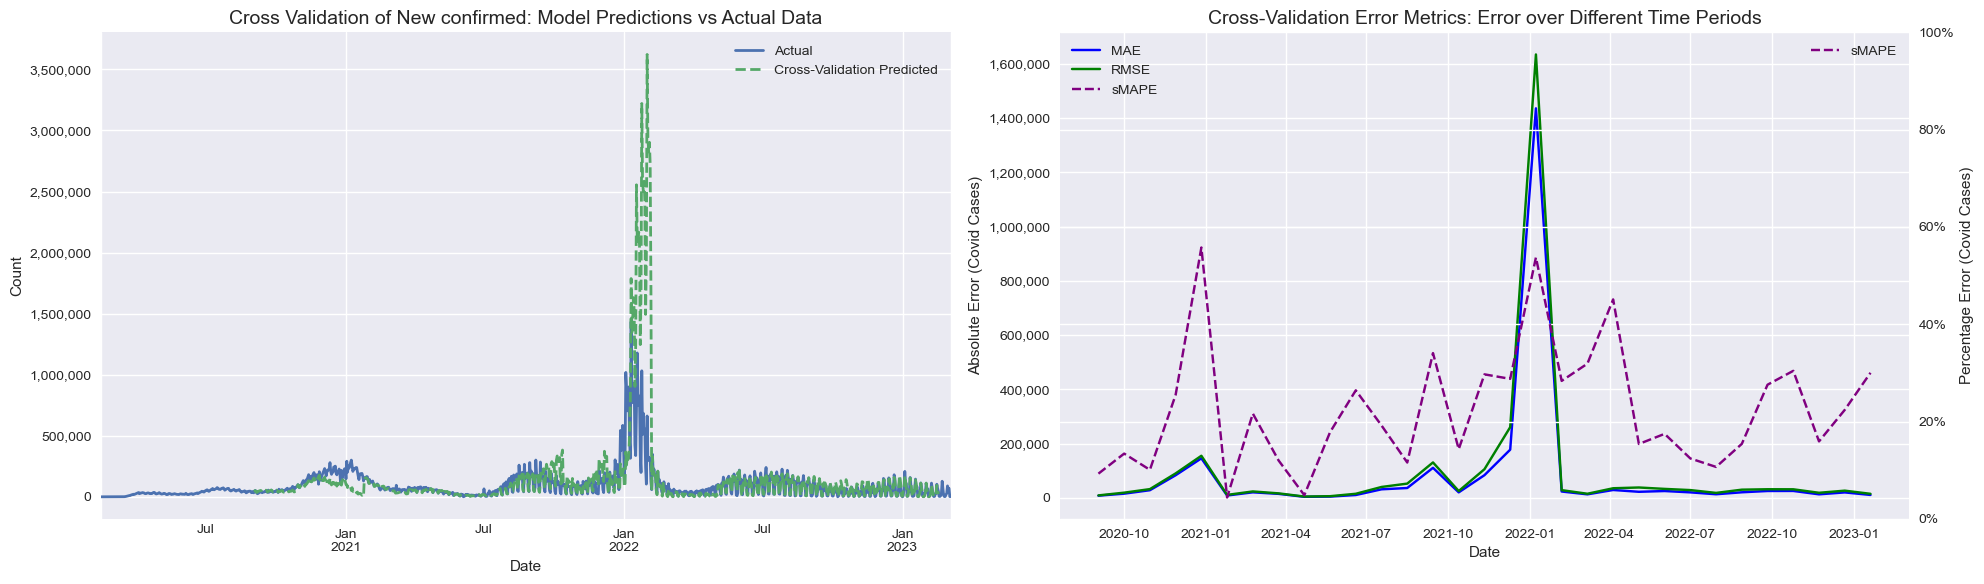

In [201]:
if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_5 = train_model(y_train, pipeline, rolling_cv, X_train)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, y_train.name)

    # pm.model_selection.cross_validate(pipeline, y_train, X_train, cv=rolling_cv, scoring='mean_squared_error')

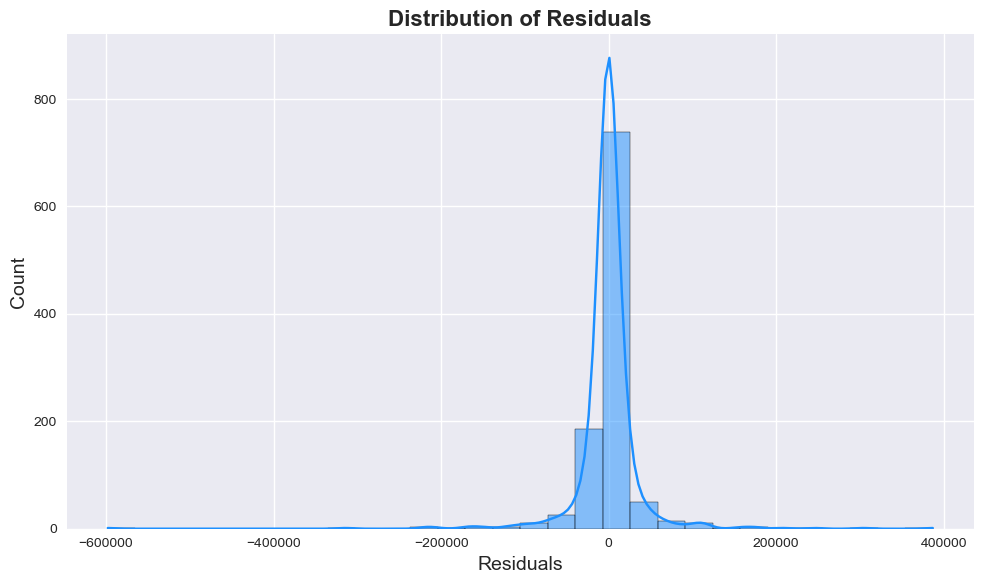

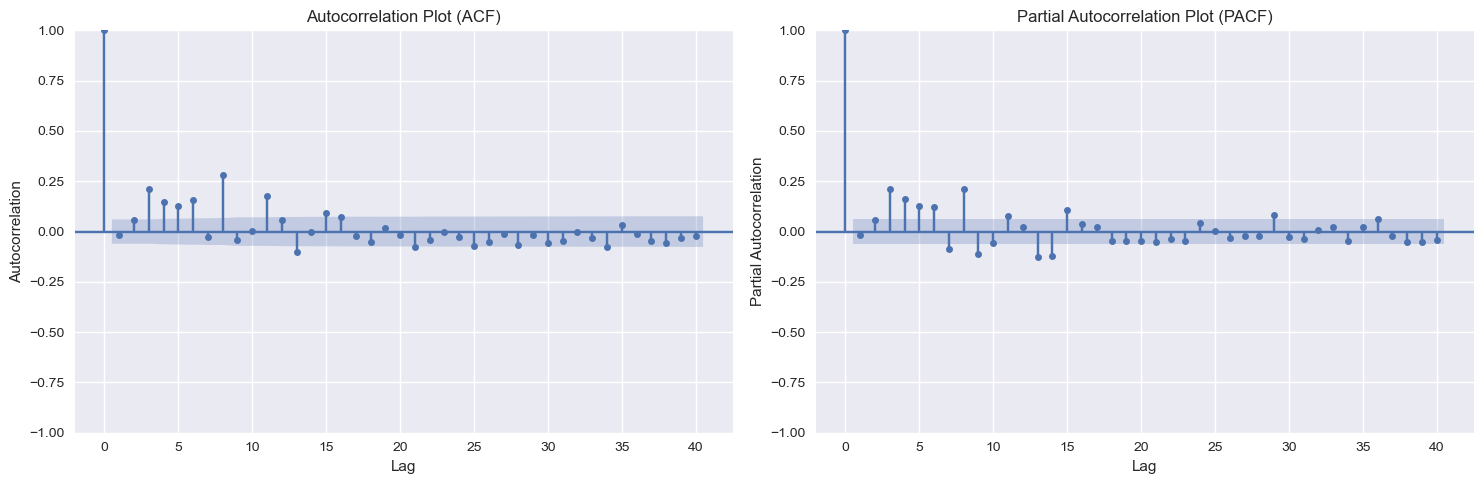

In [202]:

# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(y_train, model_5, X_train)


In [203]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(y_train, y_test, model_5, X_test)


In [204]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Exogenous ' + str(model_5.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()
    
in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
MAE                                    47635.216405   
RMSE                                   60253.263957   
sMAPE                                     23.840699   

Validation Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
MAE                                    61999.073270   
RMSE                                   77662.133258   
sMAPE                                     22.280213   

Validation Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
MAE                                             73107.036375   
RMSE                                            92348.111389   
sMAPE                                              21.588938   

Validation Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  \
MAE                                             59686.993980   
RMSE                                            75135.692415   
sMAPE                                              19.863360   

Validation Metric  Exogenous ARIMA(6,1,2)(1,1,1)[7] intercept  
MAE                                              80552.410590  
RMSE                                             96090.155272  
sMAPE                                               22.450120

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
R-squared                                 0.836273   
MAE                                   21848.679151   
RMSE                                  53173.223443   
sMAPE                                    12.439351   

In-Sample Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
R-squared                                 0.865498   
MAE                                   19750.621561   
RMSE                                  48194.508623   
sMAPE                                    11.759770   

In-Sample Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
R-squared                                          0.903506   
MAE                                            16936.208488   
RMSE                                           40820.910422   
sMAPE                                             10.522893   

In-Sample Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  \
R-squared                                          0.881228   
MAE                                            17615.753920   
RMSE                                           45288.652061   
sMAPE                                             10.374079   

In-Sample Metric  Exogenous ARIMA(6,1,2)(1,1,1)[7] intercept  
R-squared                                           0.903506  
MAE                                             16936.208488  
RMSE                                            40820.910422  
sMAPE                                              10.522893

In [205]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_5, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_5.summary()

Model pickled to models/Exogenous ARIMA(6,1,2)(1,1,1)[7] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1115
Model:             SARIMAX(6, 1, 2)x(1, 1, [1], 7)   Log Likelihood               -3494.708
Date:                             Sun, 30 Jul 2023   AIC                           7013.417
Time:                                     20:56:24   BIC                           7073.529
Sample:                                          0   HQIC                          7036.151
                                            - 1115                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0101      0.221     -0.046      0.964      -0.443       0.422
ar.L1         -0.7244     10.874     -0.067      0.947     -22.038      20.589
ar.L2         -0.2466     12.763     -0.019      0.985     -25.261      24.768
ar.L3         -0.1501      8.946     -0.017      0.987     -17.685      17.385
ar.L4         -0.0515      6.032     -0.009      0.993     -11.873      11.770
ar.L5         -0.0387      3.531     -0.011      0.991      -6.959       6.881
ar.L6          0.0782      2.176      0.036      0.971      -4.186       4.342
ma.L1          0.0154     10.876      0.001      0.999     -21.301      21.332
ma.L2         -0.2578      5.055     -0.051      0.959     -10.165       9.649
ar.S.L7        0.0303      0.240      0.126      0.899      -0.440       0.501
ma.S.L7       -0.7004      0.029    -23.929      0.000      -0.758      -0.643
sigma2        32.1756      0.678     47.426      0.000      30.846      33.505
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4371.38
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               6.11   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <a id='toc3_4_2_'></a>[Tuned SARIMAX Model](#toc0_)

In [206]:
# # Flag to determine if the model should be trained or loaded from disk
training = True

if training:
    # # # # If training is required:
    
    # # # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    # # # and then automatically determines the best ARIMA order within the given range using auto_arima.
    # estimators = [
    #     ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    #     ("model", pm.auto_arima(y_train,
    #                     X_train,
    #                     start_p=3,
    #                     d=1,
    #                     star_q=2,
    #                     max_p=6,
    #                     max_q=4,
    #                     start_P=1,
    #                     D=1,
    #                     start_Q=1,
    #                     max_P=3,
    #                     max_Q=3,
    #                     m=7,
    #                     seasonal=True, 
    #                     stationary=True,
    #                     trace=True))]


    # pipeline = Pipeline(estimators)
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= (6, 0, 3), 
                    seasonal_order =(1, 0, 0, 7),
                    suppress_warnings=True))               
                    ]

    pipeline = Pipeline(estimators) 

else:
    # If not training, then load the pre-trained model from disk
    model_6 = joblib.load('models/Exogenous ARIMA(6,0,3)(1,0,0)[7] intercept.pkl')
    print("model_6 loaded successfully")



0it [00:00, ?it/s]

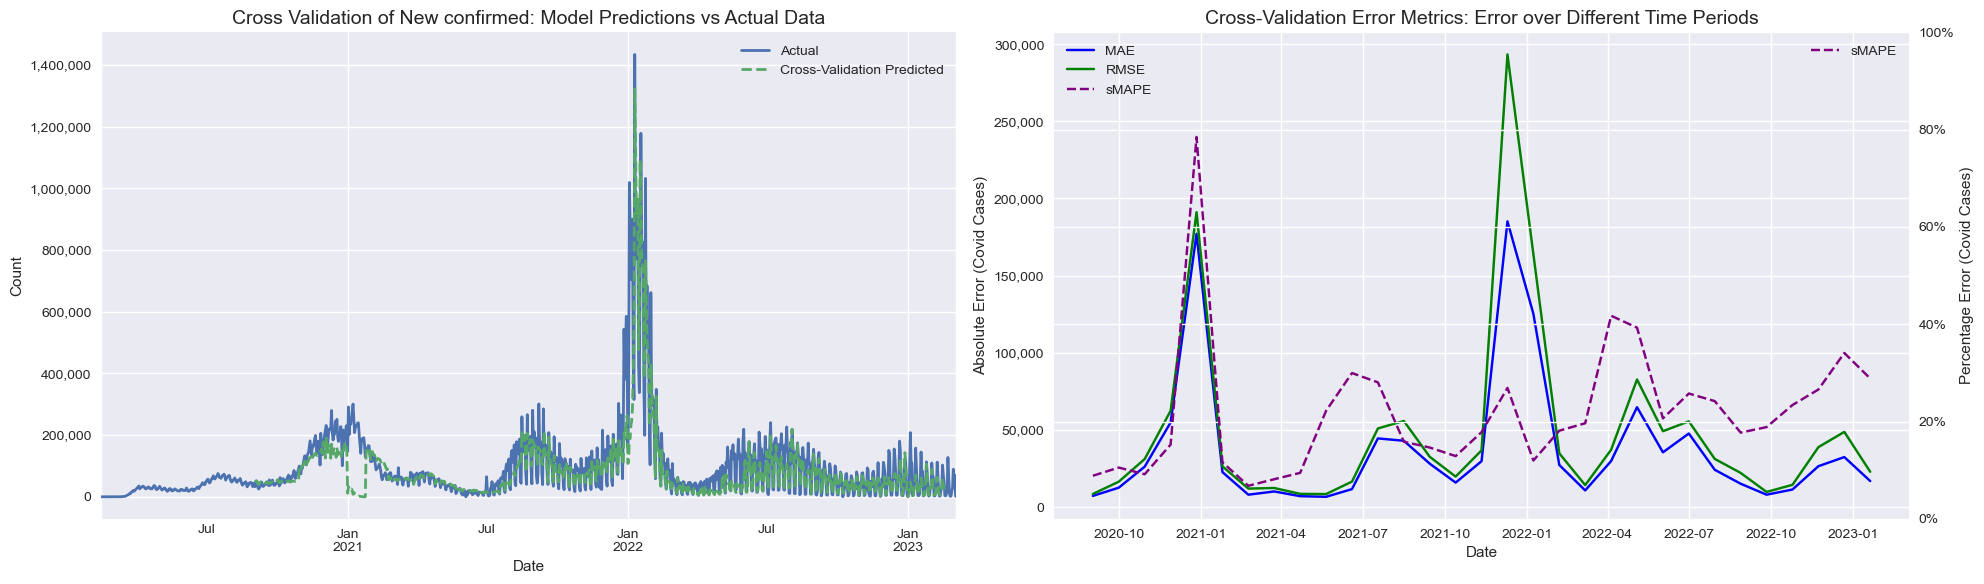

In [207]:
if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_6 = train_model(y_train, pipeline, rolling_cv, X_train)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, y_train.name)



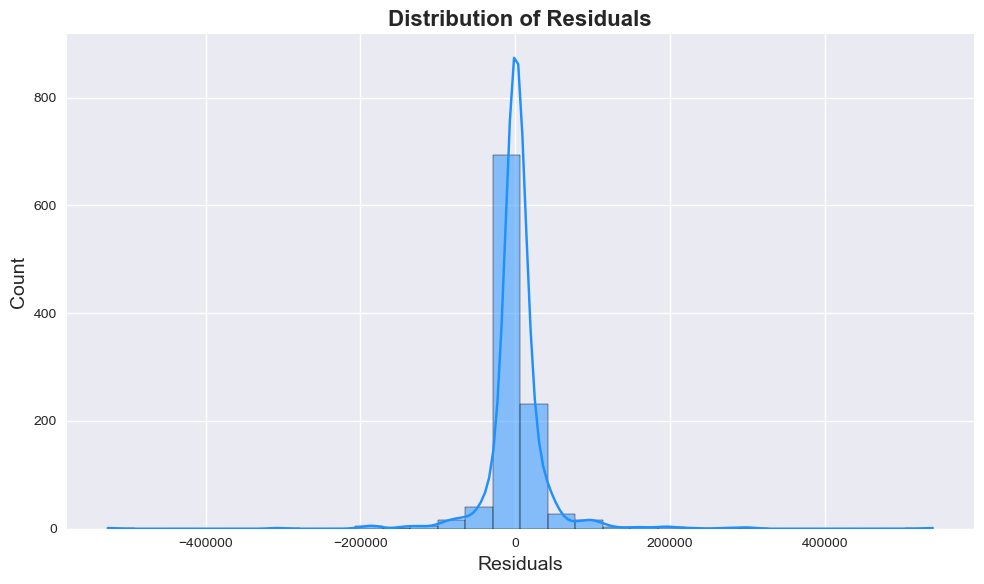

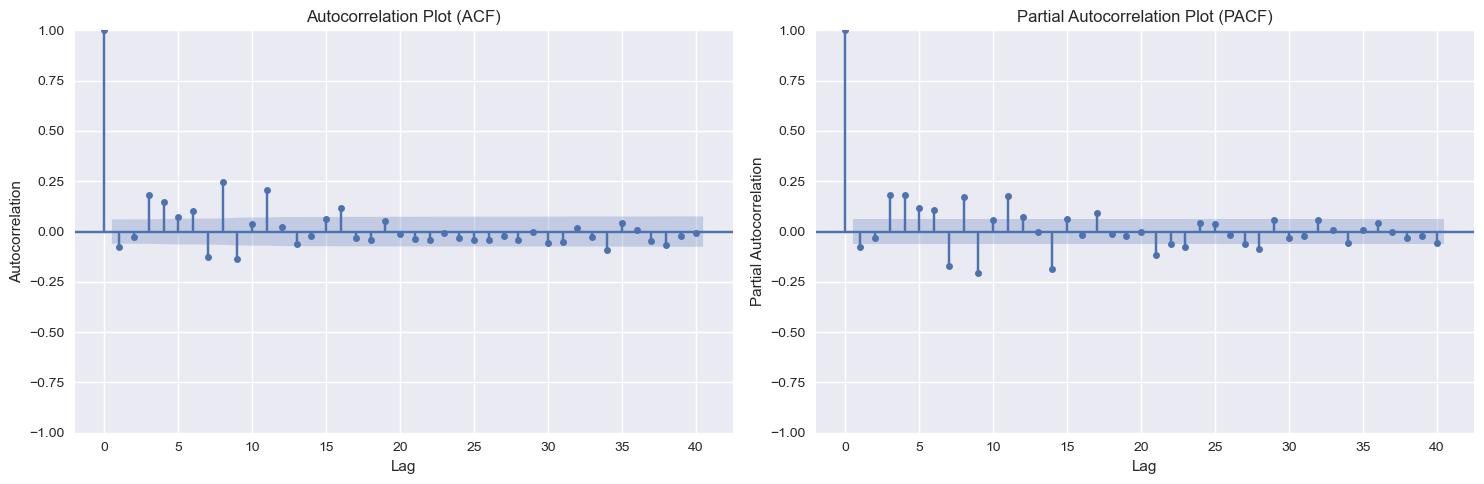

In [208]:
# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(y_train, model_6, X_train)


In [209]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(y_train, y_test, model_6, X_test)


In [210]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Exogenous ' + str(model_6.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()

in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
if training:
    display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
MAE                                    47635.216405   
RMSE                                   60253.263957   
sMAPE                                     23.840699   

Validation Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
MAE                                    61999.073270   
RMSE                                   77662.133258   
sMAPE                                     22.280213   

Validation Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
MAE                                             73107.036375   
RMSE                                            92348.111389   
sMAPE                                              21.588938   

Validation Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  \
MAE                                             59686.993980   
RMSE                                            75135.692415   
sMAPE                                              19.863360   

Validation Metric  Exogenous ARIMA(6,1,2)(1,1,1)[7] intercept  \
MAE                                              80552.410590   
RMSE                                             96090.155272   
sMAPE                                               22.450120   

Validation Metric  Exogenous ARIMA(6,0,3)(1,0,0)[7] intercept  
MAE                                              37653.197254  
RMSE                                             48704.357882  
sMAPE                                               21.871284

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
R-squared                                 0.836273   
MAE                                   21848.679151   
RMSE                                  53173.223443   
sMAPE                                    12.439351   

In-Sample Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
R-squared                                 0.865498   
MAE                                   19750.621561   
RMSE                                  48194.508623   
sMAPE                                    11.759770   

In-Sample Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
R-squared                                          0.903506   
MAE                                            16936.208488   
RMSE                                           40820.910422   
sMAPE                                             10.522893   

In-Sample Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  \
R-squared                                          0.881228   
MAE                                            17615.753920   
RMSE                                           45288.652061   
sMAPE                                             10.374079   

In-Sample Metric  Exogenous ARIMA(6,1,2)(1,1,1)[7] intercept  \
R-squared                                           0.903506   
MAE                                             16936.208488   
RMSE                                            40820.910422   
sMAPE                                              10.522893   

In-Sample Metric  Exogenous ARIMA(6,0,3)(1,0,0)[7] intercept  
R-squared                                           0.887431  
MAE                                             18574.620362  
RMSE                                            44090.189104  
sMAPE                                              11.069973

In [211]:
if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_6, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_6.summary()

Model pickled to models/Exogenous ARIMA(6,0,3)(1,0,0)[7] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1115
Model:             SARIMAX(6, 0, 3)x(1, 0, [], 7)   Log Likelihood               -3612.755
Date:                            Sun, 30 Jul 2023   AIC                           7249.510
Time:                                    20:57:54   BIC                           7309.710
Sample:                                         0   HQIC                          7272.269
                                           - 1115                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4370      0.907      0.482      0.630      -1.340       2.214
ar.L1         -0.8316      0.049    -17.102      0.000      -0.927      -0.736
ar.L2         -0.5991      0.039    -15.328      0.000      -0.676      -0.523
ar.L3          0.0476      0.039      1.214      0.225      -0.029       0.125
ar.L4          0.4706      0.036     13.190      0.000       0.401       0.541
ar.L5          0.3844      0.032     11.939      0.000       0.321       0.448
ar.L6          0.4249      0.023     18.359      0.000       0.380       0.470
ma.L1          1.0439      0.052     20.158      0.000       0.942       1.145
ma.L2          1.0910      0.043     25.161      0.000       1.006       1.176
ma.L3          0.4994      0.054      9.217      0.000       0.393       0.606
ar.S.L7        0.9784      0.007    132.516      0.000       0.964       0.993
sigma2        39.9176      0.888     44.969      0.000      38.178      41.657
===================================================================================
Ljung-Box (L1) (Q):                   1.59   Jarque-Bera (JB):              3681.41
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               6.12   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## <a id='toc3_5_'></a>[Brute Force Search for SARIMAX Model](#toc0_)

In [212]:
brute_force = False


In [213]:

def sarimax(ts,exo,all_param):
    results = []
    for param in all_param:
        try:
            mod = SARIMAX(ts,
                        exog = exo,
                        order=param[0],
                        seasonal_order=param[1])
            res = mod.fit()
            results.append((res,res.aic,param))
            print('Tried out SARIMAX{}x{} - AIC:{}'.format(param[0], param[1], round(res.aic,2)))
        except Exception as e:
            print(e)
            continue
            
    return results

if brute_force:
    boxcox = BoxCoxEndogTransformer(lmbda2=1e-2)
    transformed_y = boxcox.fit_transform(y_train)

    # set parameter range
    p,d,q = range(1,4),[1],range(0,4)
    P,D,Q,s = range(0,3),[1],range(0,3),[7]
    # list of all parameter combos
    pdq = list(product(p, d, q))
    seasonal_pdq = list(product(P, D, Q, s))
    all_param = list(product(pdq,seasonal_pdq))

    all_res = sarimax(transformed_y, X_train,all_param)


In [214]:
if brute_force:
    grid = pd.DataFrame(all_res).sort_values(by=2).rename(columns={0: 'drop', 1:'AIC',2:'Order'}).drop(columns='drop')

    fig, ax = plt.subplots(figsize=(15,5))
    grid.plot(x='Order', y='AIC', ax=ax, marker='o', linestyle='--', color='r')

    # Setting axis labels
    ax.set_xlabel("ARIMA Order")
    ax.set_ylabel("AIC Value")
    ax.set_title('Grid Search of ARIMA Order and AIC Value')

    # Making x-ticks vertical
    plt.xticks(rotation=90)

    # Marking the lowest AIC with a vertical line
    min_AIC_order = grid['AIC'].argmin()
    ax.axvline(x=min_AIC_order, color='b', linestyle='--', label=f"Lowest AIC at {grid.loc[min_AIC_order, 'Order']}")
    ax.legend()

    # Setting y-axis limits
    ax.set_ylim(26300, 27200)

    plt.show()

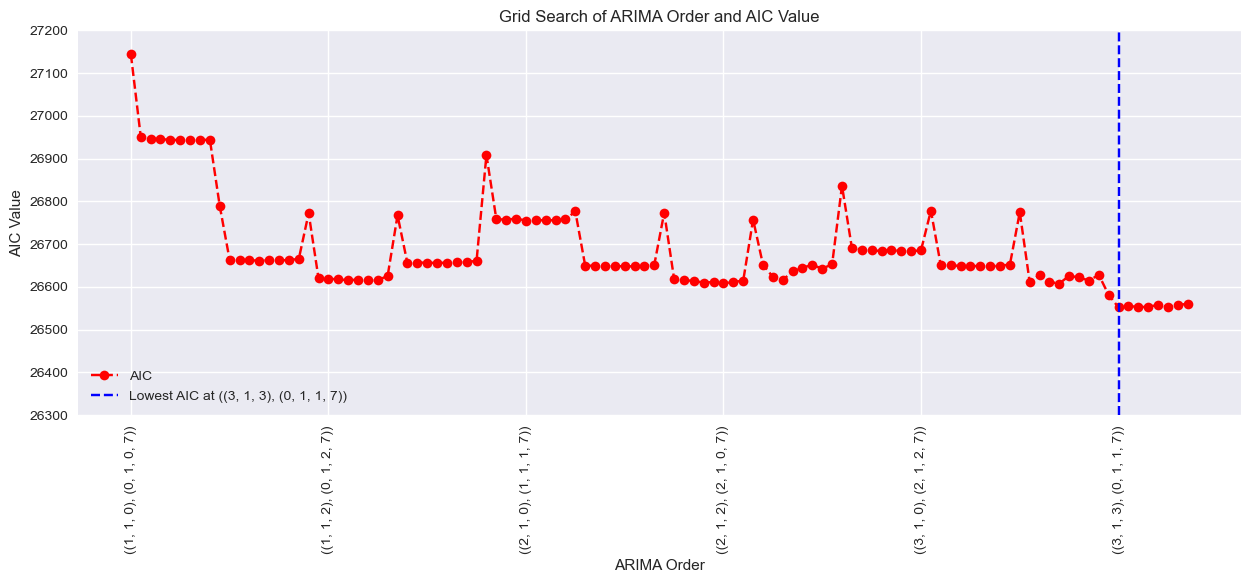

In [215]:
if brute_force:
    boxcox = BoxCoxEndogTransformer(lmbda2=1e-2)
    transformed_y = boxcox.fit_transform(y_train)

    # set parameter range
    p,d,q = range(4,7),[1],range(0,4)
    P,D,Q,s = range(0,3),[1],range(0,3),[7]

    # list of all parameter combos
    pdq = list(product(p, d, q))
    seasonal_pdq = list(product(P, D, Q, s))
    all_param = list(product(pdq,seasonal_pdq))

    all_res_1 = sarimax(transformed_y, X_train, all_param)


In [216]:
if brute_force:
    grid = pd.DataFrame(all_res_1).sort_values(by=2).rename(columns={0: 'drop', 1:'AIC',2:'Order'}).drop(columns='drop')

    fig, ax = plt.subplots(figsize=(15,5))
    grid.plot(x='Order', y='AIC', ax=ax, marker='o', linestyle='--', color='r')

    # Setting axis labels
    ax.set_xlabel("ARIMA Order")
    ax.set_ylabel("AIC Value")
    ax.set_title('Grid Search of ARIMA Order and AIC Value')

    # Making x-ticks vertical
    plt.xticks(rotation=90)

    # Marking the lowest AIC with a vertical line
    min_AIC_order = grid['AIC'].argmin()
    ax.axvline(x=min_AIC_order, color='b', linestyle='--', label=f"Lowest AIC at {grid.loc[min_AIC_order, 'Order']}")
    ax.legend()

    # Setting y-axis limits
    ax.set_ylim(26300, 27200)

    plt.show()

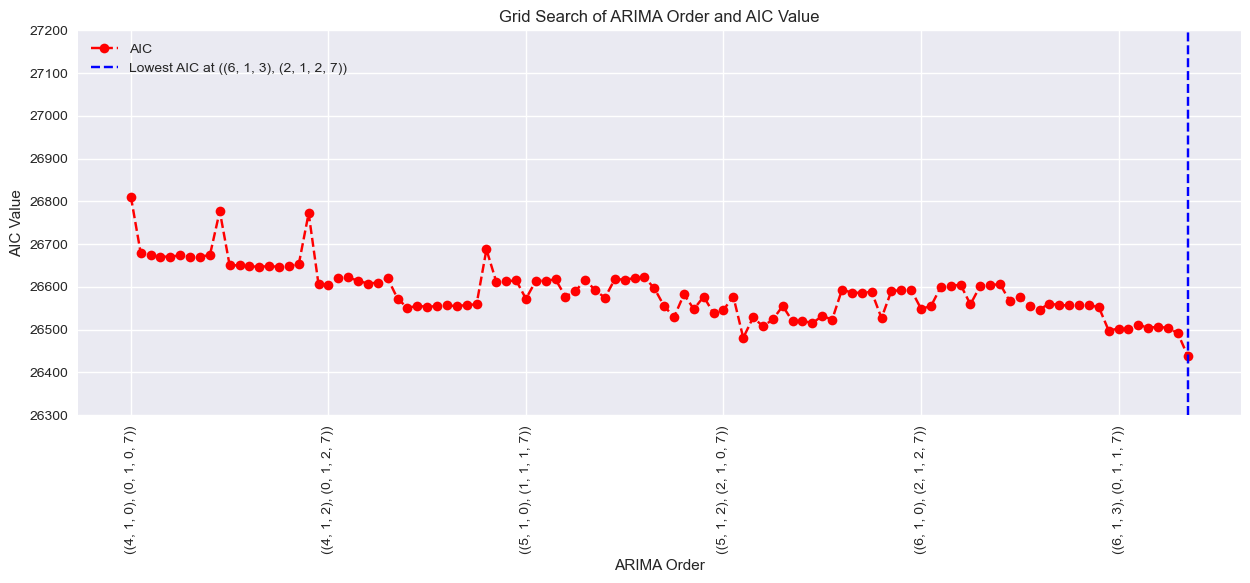

In [217]:
# # Flag to determine if the model should be trained or loaded from disk
training = True

if training:
    # # # If training is required:
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= (6, 1, 3), 
                    seasonal_order =(2, 1, 2, 7),
                    suppress_warnings=True))               
                    ]

    pipeline = Pipeline(estimators) 

else:
    # If not training, then load the pre-trained model from disk
    model_7 = joblib.load('models/Exogenous ARIMA(6,1,3)(2,1,2)[7]')
    print("model_7 loaded successfully")



0it [00:00, ?it/s]

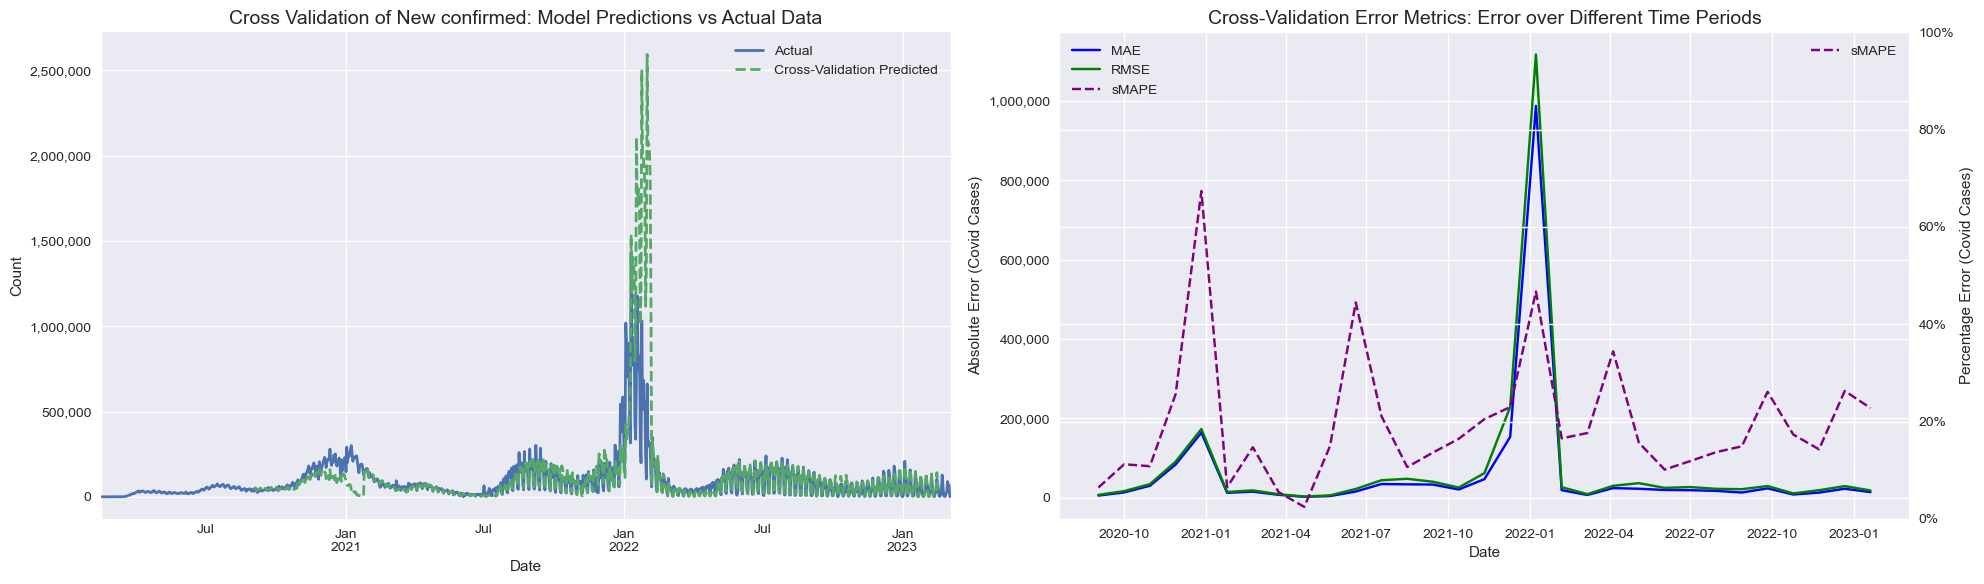

In [218]:
if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_7 = train_model(y_train, pipeline, rolling_cv, X_train)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, y_train.name)



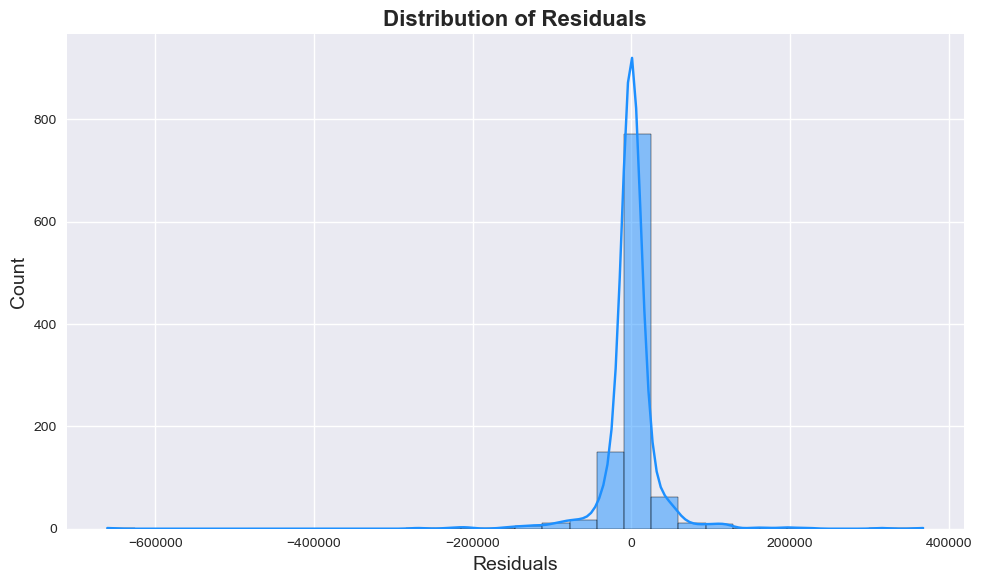

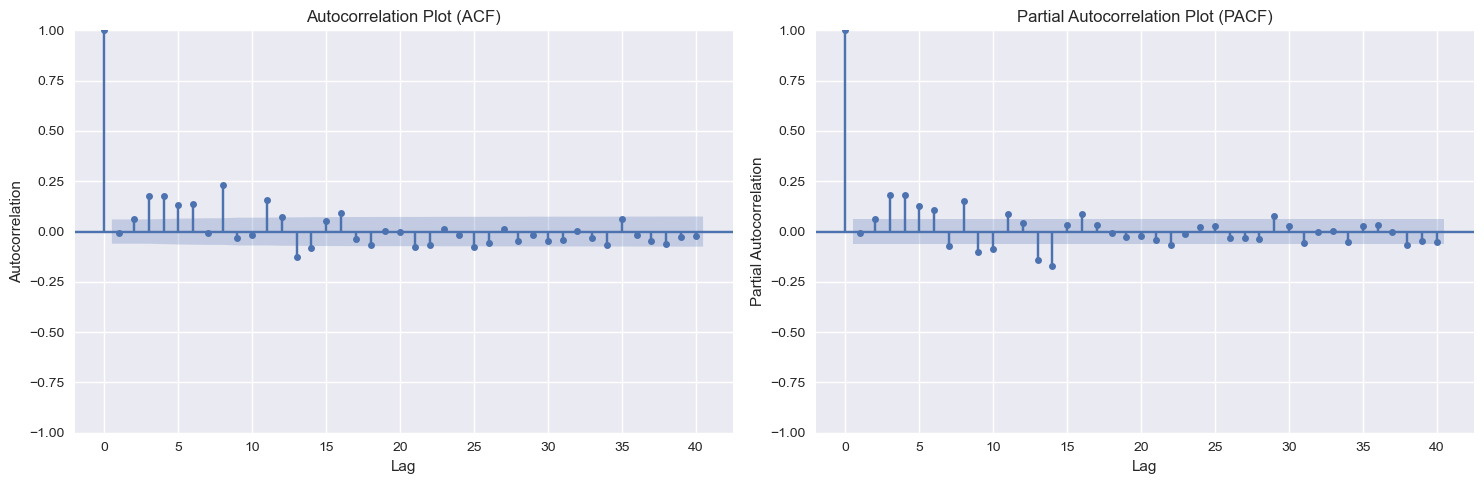

In [219]:
# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(y_train, model_7, X_train)


In [220]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(y_train, y_test, model_7, X_test)


In [221]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Exogenous ' + str(model_7.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()

in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
if training:
    display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
MAE                                    47635.216405   
RMSE                                   60253.263957   
sMAPE                                     23.840699   

Validation Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
MAE                                    61999.073270   
RMSE                                   77662.133258   
sMAPE                                     22.280213   

Validation Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
MAE                                             73107.036375   
RMSE                                            92348.111389   
sMAPE                                              21.588938   

Validation Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  \
MAE                                             59686.993980   
RMSE                                            75135.692415   
sMAPE                                              19.863360   

Validation Metric  Exogenous ARIMA(6,1,2)(1,1,1)[7] intercept  \
MAE                                              80552.410590   
RMSE                                             96090.155272   
sMAPE                                               22.450120   

Validation Metric  Exogenous ARIMA(6,0,3)(1,0,0)[7] intercept  \
MAE                                              37653.197254   
RMSE                                             48704.357882   
sMAPE                                               21.871284   

Validation Metric  Exogenous ARIMA(6,1,3)(2,1,2)[7] intercept  
MAE                                              60594.939815  
RMSE                                             72791.482175  
sMAPE                                               19.491671

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
R-squared                                 0.836273   
MAE                                   21848.679151   
RMSE                                  53173.223443   
sMAPE                                    12.439351   

In-Sample Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
R-squared                                 0.865498   
MAE                                   19750.621561   
RMSE                                  48194.508623   
sMAPE                                    11.759770   

In-Sample Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
R-squared                                          0.903506   
MAE                                            16936.208488   
RMSE                                           40820.910422   
sMAPE                                             10.522893   

In-Sample Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  \
R-squared                                          0.881228   
MAE                                            17615.753920   
RMSE                                           45288.652061   
sMAPE                                             10.374079   

In-Sample Metric  Exogenous ARIMA(6,1,2)(1,1,1)[7] intercept  \
R-squared                                           0.903506   
MAE                                             16936.208488   
RMSE                                            40820.910422   
sMAPE                                              10.522893   

In-Sample Metric  Exogenous ARIMA(6,0,3)(1,0,0)[7] intercept  \
R-squared                                           0.887431   
MAE                                             18574.620362   
RMSE                                            44090.189104   
sMAPE                                              11.069973   

In-Sample Metric  Exogenous ARIMA(6,1,3)(2,1,2)[7] intercept  
R-squared                                           0.902600  
MAE                                             16904.951828  
RMSE                                            41012.064792  
sMAPE                                              10.276929

In [222]:
if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_7, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_7.summary()

Model pickled to models/Exogenous ARIMA(6,1,3)(2,1,2)[7] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1115
Model:             SARIMAX(6, 1, 3)x(2, 1, [1, 2], 7)   Log Likelihood               -3475.264
Date:                                Sun, 30 Jul 2023   AIC                           6980.528
Time:                                        21:04:49   BIC                           7055.669
Sample:                                             0   HQIC                          7008.945
                                               - 1115                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0128      0.055     -0.233      0.816      -0.121       0.095
ar.L1         -2.1159      0.128    -16.562      0.000      -2.366      -1.865
ar.L2         -1.7873      0.316     -5.651      0.000      -2.407      -1.167
ar.L3         -0.9169      0.340     -2.696      0.007      -1.584      -0.250
ar.L4         -0.5837      0.229     -2.553      0.011      -1.032      -0.136
ar.L5         -0.3411      0.132     -2.581      0.010      -0.600      -0.082
ar.L6         -0.1094      0.046     -2.363      0.018      -0.200      -0.019
ma.L1          1.4113      0.127     11.101      0.000       1.162       1.660
ma.L2          0.2808      0.228      1.229      0.219      -0.167       0.728
ma.L3         -0.3510      0.125     -2.808      0.005      -0.596      -0.106
ar.S.L7        0.3375      0.156      2.164      0.030       0.032       0.643
ar.S.L14       0.2014      0.036      5.555      0.000       0.130       0.272
ma.S.L7       -0.9942      0.162     -6.136      0.000      -1.312      -0.677
ma.S.L14       0.1187      0.119      1.001      0.317      -0.114       0.351
sigma2        30.9372      0.663     46.645      0.000      29.637      32.237
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4409.27
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.75   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## <a id='toc3_6_'></a>[Final Results and Evaluation](#toc0_)

In [223]:
display(val_eval_holder.style.background_gradient(cmap='coolwarm', axis=1))
display(in_sample_eval_holder.style.background_gradient(cmap='coolwarm', axis=1))
display(out_of_sample_eval_holder.style.background_gradient(cmap='coolwarm', axis=1))

In [224]:

def run_analysis(in_sample_set, out_of_sample_set, pipeline, rolling_cv, training=True, X_train=None, X_test=None):
    """
    Train a model, plot validation results, evaluate the forecast, and store results.
    
    Parameters:
    - in_sample_set (pd.Series or pd.DataFrame): Time series data for model training.
    - out_of_sample_set (pd.Series or pd.DataFrame): Time series data for forecasting.
    - pipeline: The model pipeline or configuration.
    - rolling_cv: Cross-validation window or method.

    Returns:
    - val_scores (pd.DataFrame or pd.Series): Validation scores from the model.
    - arima_result (tuple or dict): Results of the forecast evaluation.
    - model: Trained model.
    """
    if training:
        # If in training mode:
        
        # Train the model using the specified pipeline and cross-validation window
        daily_values, val_scores, model = train_model(in_sample_set, pipeline, rolling_cv, X_train)

        try:
            print("Almost Done Analyzing", str(model.steps[-1][1]).strip())
        except:
            print("Almost Done Analyzing", model)
        
        # Visualize the model's performance on the validation set
        plot_combined_charts(daily_values, val_scores, in_sample_set.name)

    
    # Visualize the model's in-sample predictions with confidence intervals
    in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model, X_train)


    # Evaluate the model's forecasting performance on the out-of-sample data
    test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model, X_test)

    # Display the summary of the trained model
    display(model.summary())

    if training:
        return val_scores, in_sample_scores, test_scores, model
    else:
        return in_sample_scores, test_scores, model



In [225]:
training = True

estimators = [
("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
("model", pm.arima.ARIMA(order= [4, 0, 3], 
                seasonal_order =[2, 0, 0, 7],
                suppress_warnings=True))                   
                ]

pipeline = Pipeline(estimators) 


0it [00:00, ?it/s]

Almost Done Analyzing ARIMA(4,0,3)(2,0,0)[7] intercept


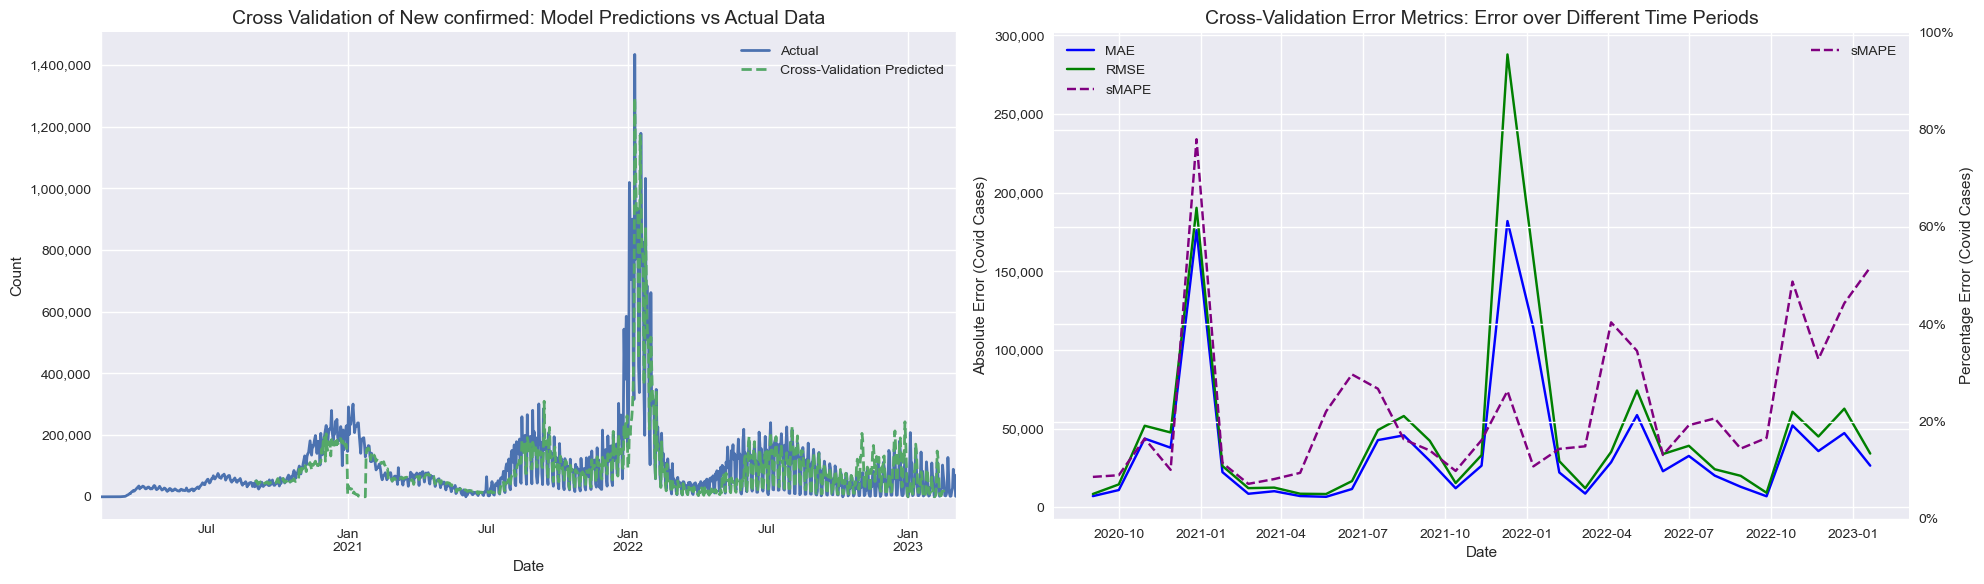

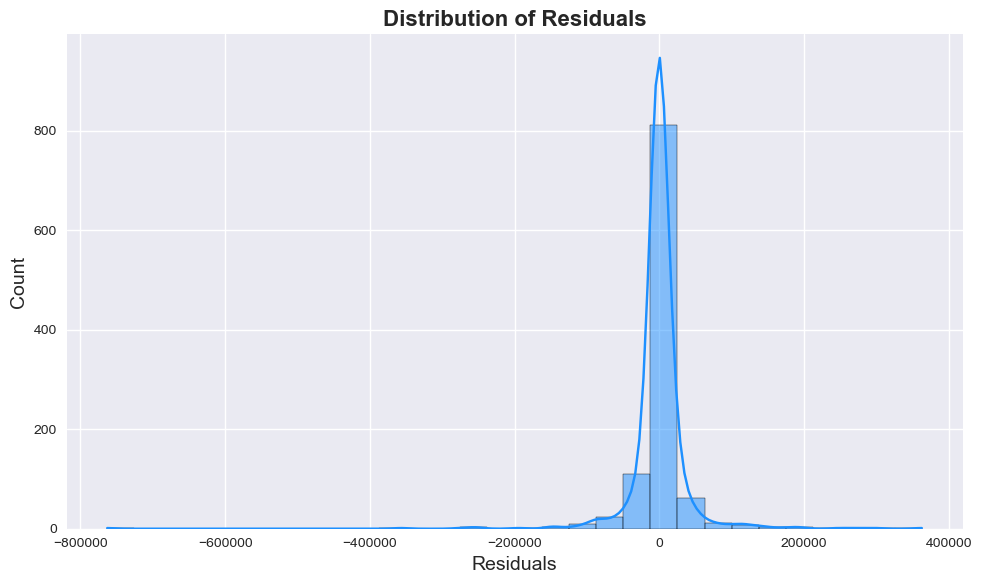

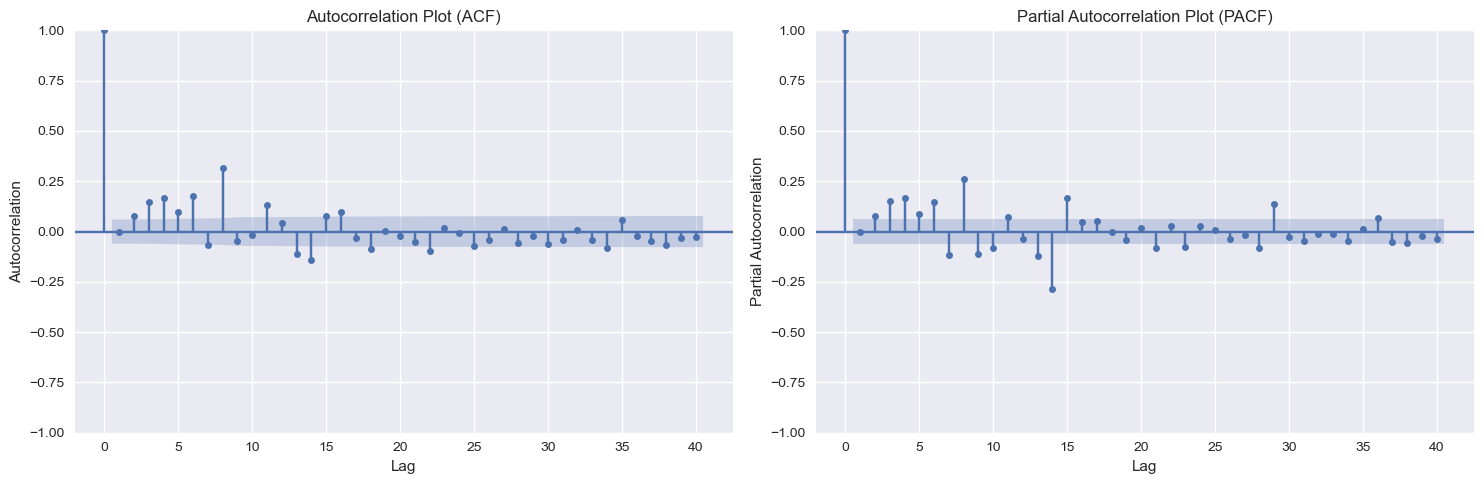

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1115
Model:             SARIMAX(4, 0, 3)x(2, 0, [], 7)   Log Likelihood               -3574.259
Date:                            Sun, 30 Jul 2023   AIC                           7170.518
Time:                                    21:09:12   BIC                           7225.700
Sample:                                         0   HQIC                          7191.380
                                           - 1115                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0031      0.055      0.057      0.955      -0.106       0.112
ar.L1          1.9010      0.066     28.708      0.000       1.771       2.031
ar.L2         -1.7098      0.107    -15.916      0.000      -1.920      -1.499
ar.L3          0.7112      0.086      8.230      0.000       0.542       0.881
ar.L4          0.0534      0.041      1.300      0.194      -0.027       0.134
ma.L1         -1.7147      0.063    -27.414      0.000      -1.837      -1.592
ma.L2          1.5899      0.076     20.860      0.000       1.441       1.739
ma.L3         -0.5587      0.049    -11.451      0.000      -0.654      -0.463
ar.S.L7        0.5088      0.016     31.037      0.000       0.477       0.541
ar.S.L14       0.4885      0.016     29.956      0.000       0.457       0.520
sigma2        34.7232      0.653     53.175      0.000      33.443      36.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4848.79
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               5.53   Skew:                            -1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [226]:

if training:
    val_scores, in_sample_scores, test_scores, model  = run_analysis(in_sample_set, out_of_sample_set, pipeline, rolling_cv, True, X_train=X_train, X_test=X_test)
else:
    in_sample_scores, test_scores, model  = run_analysis(in_sample_set, out_of_sample_set, pipeline, rolling_cv, False, X_train=X_train, X_test=X_test)



In [227]:

type_of_model = 'Seasonal'
# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = f'{type_of_model} ' + str(model.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()
in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results

display(val_eval_holder.style.background_gradient(cmap='coolwarm', axis=1))
display(in_sample_eval_holder.style.background_gradient(cmap='coolwarm', axis=1))
display(out_of_sample_eval_holder.style.background_gradient(cmap='coolwarm', axis=1))